#Project title

##Mô hình hóa hiệu suất và phân tích hàng đợi của hệ thống trung tâm cuộc gọi đa giai đoạn

# 1. Team work declaration
## Workmap declaration

| Name | Student ID | Design Role | Dev Role | Eval Role | Report Role | Ass1 work description (details in text)  | Rating | week 2 outcome | week 3 outcome | week 4 outcome  |
|-----------|------------|-------------|----------|-----------|-------------|------------------------------------------|-----------------|----------------|----------------|-----------------|
|  Hoàng Thanh Chí Bảo        |      2210205      | yes      | no   | no    | yes      |                                          | A           |                |                |                 |
| Trương Tấn Huy       |      2211294      | no      | yes   | yes    | yes      |                                          | A           |                |                |                 |
| Dương Minh Hiếu | 2210978 | yes      | yes  | no    | no      |                                          | A           |                |                |                 |
| Trương Anh Khôi | 2211701 | no      | yes   | no    | yes      |                                          | A           |                |                |                 |
| Trịnh Thị Mỹ Lệ | 2211832 | no      | yes   | yes    | no      |                                          | A           |                |                |                 |
| Nguyễn Ngọc Hà My | 2212104 | yes      | no   | no    | yes      |                                          | A           |                |                |                 |
|           |            |             |          |           |             |                                          |                 |                |                |                 |
|           |            |             |          |           |             |                                          |                 |                |                |                 |


# 2. System design
> Trong thời đại công nghệ số, các dịch vụ tổng đài đóng vai trò quan trọng trong việc hỗ trợ khách hàng giải đáp thắc mắc và duy trì dịch vụ liên tục cho các doanh nghiệp. Việc tối ưu hóa hiệu năng của tổng đài – bao gồm thời gian chờ, tỷ lệ phục vụ thành công và khả năng chịu tải – là một vấn đề thiết yếu nhằm nâng cao trải nghiệm người dùng và giảm chi phí vận hành.

> Mô hình hàng đợi (Queueing Model) là một công cụ mạnh mẽ giúp mô phỏng, phân tích và dự đoán hiệu suất của hệ thống tổng đài. Bằng cách sử dụng các mô hình M/M/c/K, ta có thể mô phỏng quá trình khách hàng gọi đến, được xử lý qua các cấp độ khác nhau, từ đó đánh giá các chỉ tiêu hiệu năng của hệ thống.

###   Sơ đồ hệ thống hàng đợi đa cấp (Multiple-Queuing System Architecture)
Hệ thống Phone Teller được mô hình hóa thành một mạng lưới các hệ thống hàng đợi như sơ đồ minh họa.

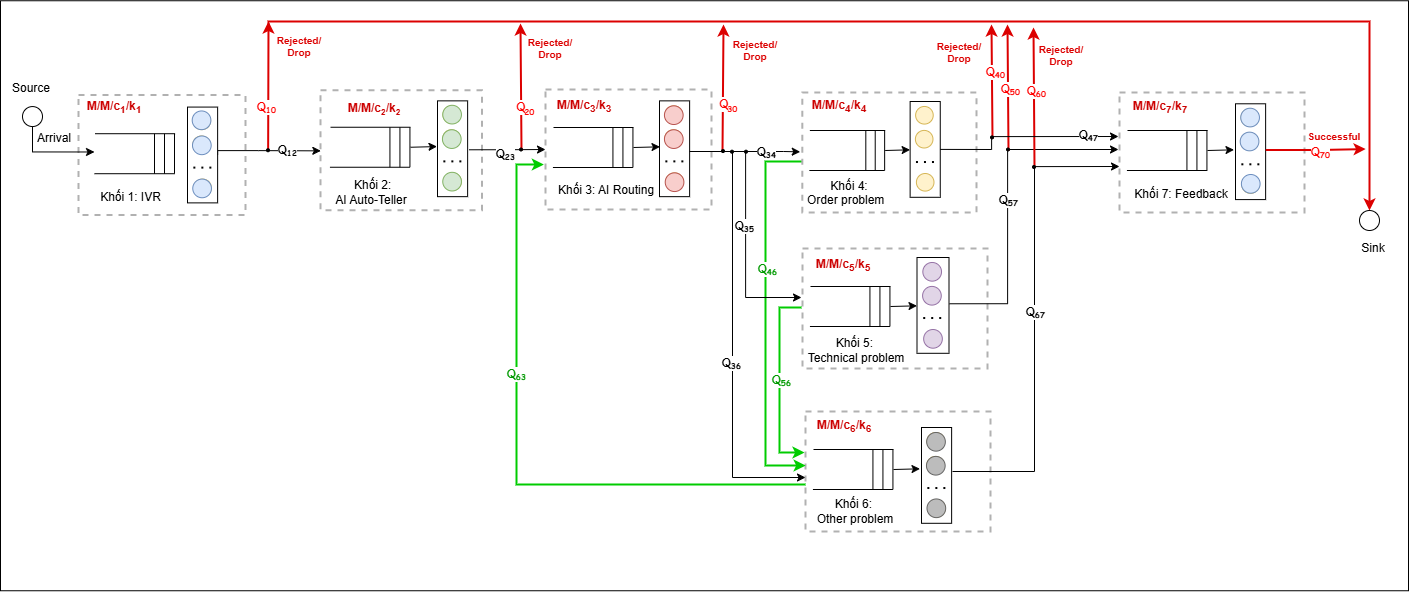


###   Hành vi hệ thống

Hệ thống Tổng đài vận hành theo một quy trình đa hàng đợi bắt đầu bằng sự kiện Arrival của cuộc gọi từ khách hàng tại Source. Khi cuộc gọi được tiếp nhận, hệ thống IVR (Interactive Voice Response) tự động phát nhạc nền, lời chào và hướng dẫn ban đầu.

Tại giai đoạn này, khách hàng có thể rời khỏi hệ thống (Exit) ngay lập tức nếu họ tự ngắt cuộc gọi hoặc nếu hệ thống bị đầy hàng đợi.

Nếu khách hàng tiếp tục, cuộc gọi sẽ được chuyển đến AI Auto-Teller, nơi AI cố gắng hiểu và giải quyết một số yêu cầu của khách hàng trong khả năng cho phép. Trong trường hợp vấn đề được giải quyết xong và khách hàng chủ động kết thúc, cuộc gọi cũng sẽ rời khỏi hệ thống (Exit) tại đây. Ngược lại, nếu AI không thể xử lý yêu cầu hoặc người dùng không hài lòng với câu trả lời của AI, hệ thống sẽ phát thông báo chuyển tiếp và đưa cuộc gọi đến AI Routing (Bộ điều hướng AI).

*"Quý khách có hài lòng với câu trả lời do AI trả lời không? Nếu không, hãy giữ máy trong giây lát, tổng đài viên của chúng tôi sẽ kết nối đến quý khách..."*

Tại AI Routing, hệ thống tiến hành phân tích nội dung và nhu cầu của khách hàng, sau đó chuyển cuộc gọi đến một trong ba hàng đợi của các phòng ban chuyên môn gồm:
- Order problem (xử lý vấn đề về đơn hàng)
- Technical problem (xử lý vấn đề về đơn hàng)
- Other problem (xử lý các vấn đề khác)

Nếu khách hàng hủy cuộc gọi trong giai đoạn này, họ sẽ rời khỏi hệ thống.

Trong quá trình xử lý tại các Queue Order problem hoặc Technical problem, nếu hàng đợi của hai phòng ban này bị đầy, cuộc gọi sẽ được chuyển sang hàng đợi phòng ban Other problem. Other problem có nhiệm vụ xử lý các vấn đề chung, các trường hợp AI không hiểu, không nhận diện được nhu cầu khách hàng hoặc đóng vai trò là hàng đợi dự phòng. Đặc biệt, nếu Other problem cũng bị đầy, cuộc gọi sẽ được đưa trở lại AI Routing để hệ thống tái định tuyến đến nơi phù hợp hơn.

Ngoài ra, sau khi khách hàng đã được phục vụ nhưng vẫn chưa hiểu rõ vấn đề và yêu cầu kết nối lại với các bộ phận Order problem hoặc Technical problem, nếu hai hàng đợi này đang đầy, cuộc gọi cũng sẽ được chuyển đến Other problem để tiếp tục hỗ trợ.

Cuối cùng, sau khi được giải quyết, khách hàng có thể tham gia đánh giá mức độ hài lòng hoặc kết thúc cuộc gọi tại hàng đợi Feedback.

*"Cuộc gọi của Quý khách đã kết thúc. Để giúp chúng tôi phục vụ tốt hơn, vui lòng nhấn phím 1 (Rất không hài lòng) đến 5 (Rất hài lòng) để đánh giá mức độ hài lòng của Quý khách về dịch vụ vừa rồi. Xin chân thành cảm ơn."*

Từ đây, cuộc gọi sẽ chính thức rời khỏi hệ thống tại Sink, hoàn tất toàn bộ chu trình vận hành của Phone Teller.







##  System Performance Steps

### 2.1. Define Goal and System
**Mục tiêu nghiên cứu và hệ thống:**
Mục tiêu chính là xây dựng mô hình mô phỏng hệ thống tổng đài đa cấp nhằm:
* Phân tích luồng cuộc gọi và các giai đoạn xử lý trong hệ thống.
* Đánh giá các chỉ tiêu như thời gian chờ trung bình, xác suất tắc nghẽn, và hiệu suất phục vụ.
* Xác định các nút nghẽn (bottleneck) và đề xuất hướng tối ưu hóa hệ thống.

**Mục tiêu hệ thống cụ thể:**
* Đánh giá sức chịu tải và ổn định: Định lượng mối quan hệ giữa Tỷ lệ cuộc gọi đến ($\lambda$) và Thời gian phản hồi trung bình ($W$). Kiểm tra tính ổn định ($\rho_i = \frac{\lambda_i}{c_i \mu_i} < 1$).
* Xác định Nút nghẽn cổ chai: Đánh giá Hiệu suất sử dụng tài nguyên ($\rho_i$), Chiều dài hàng đợi ($L_{qi}$). Đo lường Tỷ lệ Từ chối ($p_K = P(\text{hàng đợi đầy})$).
* Xác minh mô hình: Đối chiếu kết quả mô phỏng với công thức lý thuyết (Open Jackson Network và M/M/$c_i$/$K_i$).

**Phạm vi hệ thống:**
* Hệ thống được mô hình hóa là một mạng hàng đợi mở 7 khối xử lý. Mỗi khối là một hệ thống M/M/c/K độc lập, với quy tắc phục vụ FIFO.
* Các cuộc gọi đến tuân theo Phân phối Poisson ($\lambda$). Thời gian phục vụ tuân theo Phân phối Mũ ($\mu_i$).
* Các yếu tố bên ngoài không được mô phỏng: Lỗi kỹ thuật và mạng, Hành vi khách hàng phức tạp (tự ý cúp máy), Yếu tố tâm lý hoặc kỹ năng con người.
### 2.2. Service and Outcomes

Phần này mô tả các trạng thái chuyển tiếp và kết quả của một yêu cầu (cuộc gọi) khi đi qua hệ thống.

**Service**

Mỗi khối xử lý trong hệ thống — như IVR, AI Auto-Teller, AI Routing, Order Problem, Technical Problem, Other Problem, và Feedback  được xem như một dịch vụ có thời gian phục vụ trung bình ký hiệu là $1/\mu$.

 Trong quá trình phục vụ, hệ thống có thể xảy ra các ràng buộc logic và điều kiện chuyển tiếp như sau:
* Chuyển hướng nối tiếp: khi xong một quá trình trong khối xử lý: Khi một dịch vụ được server ở khối xử lý giải quyết xong, sẽ được tự động chuyển sang khối xử lý tiếp theo để tiếp tục quá trình.
* Chuyển hướng song song: Khi một hàng đợi (Technical Problem hoặc Order Problem) bị đầy, cuộc gọi sẽ tự động chuyển sang Other Problem — hàng đợi dự phòng của hệ thống.
* Quay lại/ Tái định tuyến: Khi  hàng đợi dịch vụ tư vấn (Other Problem) bị đầy, cuộc gọi sẽ tự động quay lại hàng đợi AI Routing.

**Outcomes**

Trong quá trình xử lý, mỗi cuộc gọi có thể dẫn đến một trong ba kết quả chính sau:

* Hoàn thành dịch vụ (Successful): Cuộc gọi được phục vụ đầy đủ, đi qua khối Feedback, và rời hệ thống tại Sink. Đây là trường hợp xử lý thành công.
* Thoát sớm (Rejected / Drop): Khách hàng tự ý kết thúc cuộc gọi hoặc rời hệ thống tại bất kỳ giai đoạn nào tại thời điểm đang không được phục vụ bởi server. Nguyên nhân có thể do khách hàng tự ngắt hoặc lỗi Timeout.
* Chuyển hướng (Rerouted): Cuộc gọi không được xử lý tại hàng đợi ban đầu (Order hoặc Technical Problem) do quá tải, nên được chuyển đến Other Problem hoặc AI Routing để xử lý tiếp. Đây là trường hợp điều hướng nội bộ của hệ thống nhằm đảm bảo không mất cuộc gọi.

### 2.3. Select Metrics

* Mức toàn hệ thống:
  * Throughput ($ X $): Số cuộc gọi được xử lý thành công trên một đơn vị thời gian.
  * Response Time ($ W $): Thời gian trung bình mà một cuộc gọi tồn tại trong hệ thống (từ lúc đến đến khi hoàn tất).
  * Queue Length ($ L, L_q $):
    * $L$: Số khách hàng trung bình trong hệ thống (cả phục vụ và chờ).
    * $L_q$: Số khách hàng trung bình trong hàng chờ.
  * Blocking Rate: Phần trăm cuộc gọi bị từ chối do hàng đợi đầy.
  * Abandon Rate: Phần trăm khách hàng tự ngắt máy khi chờ quá lâu.
  * Service Level (SLA):  Phần trăm cuộc gọi được xử lý trong giới hạn thời gian cho phép $ T_{SLA} $.

* Mức từng khối:
  * Service Time ($ S_i $): Thời gian xử lý trung bình tại khối i.
  * Success Rate: Tỷ lệ phục vụ thành công tại khối i.
  * Misroute Rate: Tỷ lệ định tuyến sai (ví dụ: chuyển nhầm sang bộ phận khác).
  * Reject Rate ($ p_{K_i} $): Tỷ lệ bị từ chối tại khối i do hàng đợi đầy.

### 2.4. List System Parameters
| **Ký hiệu** | **Ý nghĩa**                                     | **Đơn vị / Ghi chú**           |
| ----------- | ----------------------------------------------- | ------------------------------ |
| $ \lambda $ | Tốc độ đến tổng thể (số cuộc gọi/phút)          | Cuộc gọi/phút                  |
| $ r_{ij} $  | Xác suất định tuyến từ khối *i* sang khối *j*   | $ \sum_j r_{ij} = 1 $          |
| $ \mu_i $   | Tốc độ phục vụ tại khối *i*                     | Khách/phút                     |
| $ c_i $     | Số lượng nhân viên hoặc tài nguyên tại khối *i* | Số server                      |
| $ K_i $     | Dung lượng hàng đợi tối đa tại khối *i*         | Bao gồm cả server đang phục vụ |
| $ T_{SLA} $ | Giới hạn thời gian đáp ứng dịch vụ              | Phút hoặc giây                 |


### 2.5. List Factors to Study

 **Các khối trong hệ thống**

Các khối trong hệ thống có thứ tự ưu tiên mà các công việc trong hàng đợi hoặc hàng chờ được phục vụ là FIFO/FCFS	(First In First Out/First Come First Served)

|**Khối**| **Tên Khối**                         | **Chức năng chính**                                                   | **Loại hàng đợi (Queue Model)** |
|---| ------------------------------------ | --------------------------------------------------------------------- | ------------------------------- |
|1| IVR (Interactive Voice Response) | Tiếp nhận cuộc gọi, phát lời chào và chuyển hướng đến AI Auto-Teller. | M/M/2/10                        |
|2| AI Auto-Teller                  | Trả lời câu hỏi thường gặp hoặc phân loại yêu cầu cơ bản.             | M/M/4/20                        |
|3| AI Routing                     | Định tuyến yêu cầu đến phòng ban thích hợp.                           | M/M/3/15                        |
|4| Order Problem                    | Xử lý yêu cầu theo dõi đơn hàng, thanh toán, đổi trả.                 | M/M/6/30                        |
|5| Technical Problem                | Giải quyết sự cố kỹ thuật, lỗi web/app.                               | M/M/5/25                        |
|6| Other Problem                    | Giải quyết các yêu cầu khác hoặc khi hai bộ phận kia quá tải.         | M/M/3/20                        |
|7| Feedback                         | Ghi nhận phản hồi sau khi yêu cầu hoàn tất.                           | M/M/2/10                        |

**Các yếu tố cần nghiên cứu**

* Đối với mỗi khối $i$:

| **Ký hiệu** | **Tên gọi** | **Công thức** | **Mô tả** |
|:------------:|:--------------------------------|:--------------------------------------:|:------------------------------------------------------------|
| $\lambda_i$ | **Tốc độ đến (Arrival Rate)** | - | Số lượng yêu cầu đến khối $i$ trong một đơn vị thời gian. |
| $\rho_i$ | **Mật độ lưu lượng (Utilization)** | $\displaystyle \rho_i = \frac{\lambda_i}{c_i \mu_i}$ | Tỷ lệ sử dụng trung bình của các máy phục vụ ($c_i$) tại khối $i$. Phải nhỏ hơn 1 để hệ thống ổn định. |
| $\pi_i(0)$ | **Xác suất trạng thái rỗng** | - | Xác suất không có yêu cầu nào trong hệ thống hàng đợi tại khối $i$. |
| $L_i$ | **Số lượng yêu cầu trung bình** | $\displaystyle L_i = L_{q,i} + \frac{\lambda_i}{\mu_i}$| Số lượng yêu cầu trung bình trong toàn bộ hệ thống (hàng đợi + phục vụ) tại khối $i$. |
| $W_i$ | **Thời gian lưu trung bình** | $\displaystyle W_i = W_{q,i} + \frac{1}{\mu_i}$ | Thời gian trung bình một yêu cầu lưu lại (chờ + phục vụ) tại khối $i$. |


* Đối với hệ thống (toàn bộ mạng lưới):

  * Tổng số yêu cầu trung bình ($L$):      $L = \sum_i L_i$
  * Thời gian lưu trung bình toàn hệ thống ($W$):    $W = \frac{L}{\lambda}$
    *(Với $\lambda$ là tốc độ đến tổng cộng vào hệ thống)*
  * Tỷ lệ cuộc gọi hoàn tất quay lại chờ: Phải được tính toán dựa trên logic chuyển tiếp của mô hình (ví dụ: tỷ lệ yêu cầu bị từ chối/quay vòng do hàng đợi đầy).


**Nguyên tắc tính toán**

  * Để đảm bảo hệ thống hàng đợi ổn định và có thể tính toán bằng các công thức giải tích (analytical formulas), mật độ lưu lượng ($\rho_i$) phải nhỏ hơn 1.

  * Nguyên tắc: Chọn số lượng máy phục vụ ($c_i$) và tốc độ phục vụ ($\mu_i$) sao cho:  $\lambda_i < c_i \times \mu_i$

  * Công thức Kiểm tra Tính ổn định:  $\rho_i = \frac{\lambda_i}{c_i \mu_i} < 1$

### 2.6. List mathematical formulas

**1. Open Jackson network và ma trận định tuyến**

Mạng hàng đợi Jackson (Jackson Queueing Network) được mô tả đầy đủ bởi ba thành phần chính:

- Tốc độ đến ngoại sinh (exogenous arrival rates): $\{\gamma_i\}$
- Tốc độ phục vụ (service rates): $\{\mu_i\}$
- Và các xác suất định tuyến (routing probabilities): $\{Q_{ij}; 0 \leq i, j \leq k\}$
> *Chú thích:  $Q_{ij}$: Ký hiệu này được sử dụng xuyên suốt trong các công thức toán học và tính toán thay cho $r_{ij}$ để chỉ Xác suất Định tuyến từ nút $i$ đến nút $j$.*

Tại mỗi nút $i$, sau khi phục vụ xong:

- Khách hàng sẽ chuyển sang nút $j$ với xác suất $Q_{ij}$
- Hoặc rời khỏi hệ thống với xác suất $Q_{i0} = 1 - \sum_{j=1}^{k} Q_{ij}$.

Tập các xác suất $Q_{ij}$ tạo thành ma trận định tuyến (routing matrix) và tuân theo điều kiện:

$$
\sum_{j=0}^{k} Q_{ij} = 1, \quad \forall i = 1, \dots, k.
$$

Cách chuyển tiếp này gọi là Markov routing, vì đường đi của khách hàng giữa các nút tuân theo chuỗi Markov. Ta cũng giả sử mỗi khách cuối cùng sẽ rời hệ thống với xác suất 1 (tính chất irreducibility).

Với các giả định trên, mạng được gọi là Open Jackson Network, và tốc độ đến thực tế tại từng nút $\lambda_i$ được xác định bởi hệ phương trình lưu lượng (traffic equations):

$$
\lambda_i = \gamma_i + \sum_{j=1}^{k} \lambda_j \cdot Q_{ji}, \quad i = 1, \dots, k.
$$


**2. Cường độ lưu lượng (Traffic Intensity)**

$$
\rho = \frac{\lambda}{\mu}
$$

**3. Xác suất không có khách hàng trong hệ thống (Probability of no customers in the system)**

$$
P_0 = \left[ \sum_{n=0}^{c-1} \frac{\rho^n}{n!} + \sum_{n=c}^{K} \frac{\rho^n}{c!\, c^{n-c}} \right]^{-1}
$$

**4. Xác suất có $n$ khách hàng trong hệ thống (Probability that there are $n$ customers in the system)**

$$
P_n =
\begin{cases}
\displaystyle \frac{\rho^n}{n!} P_0 & \text{for } 0 \leq n < c \\ \\
\displaystyle \frac{\rho^n}{c!\, c^{n-c}} P_0 & \text{for } c \leq n \leq K
\end{cases}
$$

**5. Số lượng khách hàng trung bình trong hệ thống (Average number of customers in the system)**

$$
L_s = \sum_{n=0}^{K} n P_n
$$


**6. Số lượng khách hàng trung bình trong hàng đợi (Average number of customers in the queue)**

$$
L_q = \sum_{n=c}^{K} (n - c) P_n
$$


**7. Tốc độ đến hiệu dụng (Effective Arrival Rate)**

$$
\lambda_e = \lambda \cdot (1 - P_K)
$$


**8. Thời gian trung bình khách hàng chờ trong hàng đợi (Average Time spent in the queue)**

$$
W_q = \frac{L_q}{\lambda_e} = \frac{L_q}{\lambda \cdot (1 - P_K)}
$$


**9. Thời gian trung bình khách hàng ở trong hệ thống (Average Time spent in the system)**

$$
W_s = \frac{L_s}{\lambda_e} = \frac{L_s}{\lambda \cdot (1 - P_K)}
$$


> Hoặc

$$
W_s = W_q + \frac{1}{\mu}
$$


**10. Hệ số sử dụng (Utilization factor)**

$$
U = \frac{L_s - L_q}{c}
$$

**11. Định luật Little (Little's Law) ngầm trong 7 & 8**
        
 Theo Định luật Little ta có công thức tính thời gian đợi trung bình của hệ thống:
$$ W = \frac{L}{λ} $$
với $ L = L_1 + L_2 + L_3 + ... + L_n $ (n là số khối)

**12. Xác suất khách phải chờ trong hàng (Probability of waiting)**

$$
P_{\text{wait}} = \frac{\sum_{n=c}^{K-1} P_n}{1 - P_K}
$$

**13. Kỳ vọng thời gian phục vụ $E(v)$ và thời gian chờ $E(w)$**

$$
E(v) = \frac{E(n)}{\lambda (1 - P_K)}
$$

$$
E(w) = E(v) - \frac{1}{\mu}
$$


**Ma trận định tuyến $Q_{ij}$**

Cho hệ thống với xác suất định tuyến như Ma trận định tuyến $Q_{ij}$

**Thứ tự nút:**  
(0 = Sink, 1 = IVR, 2 = Auto-Teller, 3 = AI Routing, 4 = text, 5 = Technical, 6 = Other,7 = Feedback)

Với ma trận định tuyến với hàng đầu tiên đại diện khối đích i với i=7, cột đầu tiên đại diện khối nguồn j với j=7, như sau:
$$
Q =
\begin{bmatrix}
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
0 & Q_{00} & Q_{01} & Q_{02} & Q_{03} & Q_{04} & Q_{05} & Q_{06} & Q_{07} \\
1 & Q_{10} & Q_{11} & Q_{12} & Q_{13} & Q_{14} & Q_{15} & Q_{16} & Q_{17} \\
2 & Q_{20} & Q_{21} & Q_{22} & Q_{23} & Q_{24} & Q_{25} & Q_{26} & Q_{27} \\
3 & Q_{30} & Q_{31} & Q_{32} & Q_{33} & Q_{34} & Q_{35} & Q_{36} & Q_{37} \\
4 & Q_{40} & Q_{41} & Q_{42} & Q_{43} & Q_{44} & Q_{45} & Q_{46} & Q_{47} \\
5 & Q_{50} & Q_{51} & Q_{52} & Q_{53} & Q_{54} & Q_{55} & Q_{56} & Q_{57} \\
6 & Q_{60} & Q_{61} & Q_{62} & Q_{63} & Q_{64} & Q_{65} & Q_{66} & Q_{67} \\
7 & Q_{70} & Q_{71} & Q_{72} & Q_{73} & Q_{74} & Q_{75} & Q_{76} & Q_{77} \\
\end{bmatrix}
$$


Ta có ma trận như sau:
$$
Q =
\begin{bmatrix}
    & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
0 & 0.00 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0.05 & 0 & 0.95 & 0 & 0 & 0 & 0 & 0 \\
2 & 0.30 & 0 & 0 & 0.70 & 0 & 0 & 0 & 0 \\
3 & 0.05 & 0 & 0 & 0 & 0.40 & 0.30 & 0.25 & 0 \\
4 & 0.05 & 0 & 0 & 0 & 0 & 0 & 0.10 & 0.85 \\
5 & 0.05 & 0 & 0 & 0 & 0 & 0 & 0.10 & 0.85 \\
6 & 0.05 & 0 & 0 & 0.10 & 0 & 0 & 0 & 0.85 \\
7 & 1.00 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

### 2.7. Evaluation Technique
Trong phần này, hệ thống được đánh giá bằng hai phương pháp:

1. Phân tích lý thuyết (Analytical Method): Sử dụng mô hình hàng đợi M/M/c/K để tính toán các thông số hiệu năng như:
- Utilization (ρ)
- Average waiting time (W, Wq)
- Average number in system (L, Lq)
- Blocking probability P(K)

2. Mô phỏng bằng SimPy (Simulation Method): Hệ thống được mô phỏng 20.000s bằng SimPy để thu thập dữ liệu thực nghiệm, sau đó so sánh với kết quả lý thuyết về các thông số về:
- Thời gian chờ trung bình
- Số khách bị rớt
- Throughput
- Tải hệ thống theo thời gian

3. Kỹ thuật so sánh
- Sai số phần trăm (% Error)
- Biểu đồ W, L, ρ giữa theoretical vs simulation
- Đánh giá tính đúng đắn của mô hình
### 2.8. Select Workload

**Workload**

Workload A và B được chọn không ngẫu nhiên mà dựa trên lưu lượng gọi thực tế ở giờ thường và giờ cao điểm. Các giá trị λ được tính từ mô hình mạng Jackson qua xác suất định tuyến (tỷ lệ khách đi từ node này sang node khác). Các giá trị μ phản ánh thời gian phục vụ trung bình của hệ thống IVR, AI và nhân viên. Số lượng server c được chọn dựa trên khả năng phục vụ thực tế, còn K là sức chứa tối đa bao gồm server và hàng đợi. Việc chọn như vậy đảm bảo thỏa điều kiện ổn định (ρ < 1) ở workload A và kiểm tra tình huống quá tải ở workload B.

**1. Workload A (γ₁ = 30)**

**Workload A (Ngày thường):** Đây là kịch bản tải trung bình của mạng M/M/C/K trong Platoon 1, lưu lượng đầu vào được phân phối qua ma trận định tuyến nên đa số nút có $\rho_i < 1$. Hệ thống vận hành ổn định, hàng đợi ngắn, xác suất chặn $P_{ki}$ gần như bằng 0. Kịch bản này dùng để ghi nhận và báo cáo các KPI $\rho_i$, $P_{0i}$, $L_i$, $L_{qi}$, $W_i$, $W_{qi}$, $\lambda_{ei}$, $P_{ki}$ làm đường cơ sở cho so sánh.

| Nút | Mô tả        | λ (req/h) | μ (req/h) | c | K  |
|-----|--------------|-----------|-----------|---|----|
| 1   | IVR          | 30.00     | 25.00     | 3 | 20 |
| 2   | Auto-Teller  | 28.50     | 23.00     | 3 | 20 |
| 3   | AI Routing   | 20.61     | 22.00     | 3 | 18 |
| 4   | Order        | 8.24      | 12.00     | 2 | 10 |
| 5   | Technical    | 6.18      | 12.00     | 2 | 10 |
| 6   | Other        | 6.60      | 15.00     | 2 | 10 |
| 7   | Feedback     | 17.87     | 25.00     | 3 | 18 |

Bảng Hiệu suất Hệ thống (Performance Metrics)

| Nút | ρi     | P0i (%) | Pki (%) | Li     | Lqi    | λei    | Wqi (phút) | Wsi (phút) | Ui     |
|-----|--------|---------|---------|--------|--------|--------|------------|------------|--------|
| 1   | 1.2000 | 29.412  | 0.000   | 1.2941 | 0.0941 | 30.000 | 0.1882     | 2.5882     | 0.4000 |
| 2   | 1.2391 | 28.192  | 0.000   | 1.3463 | 0.1072 | 28.500 | 0.2256     | 2.8343     | 0.4130 |
| 3   | 0.9368 | 38.837  | 0.000   | 0.9720 | 0.0351 | 20.610 | 0.1023     | 2.8296     | 0.3123 |
| 4   | 0.6867 | 48.884  | 0.002   | 0.7783 | 0.0916 | 8.240  | 0.6674     | 5.6674     | 0.3433 |
| 5   | 0.5150 | 59.046  | 0.000   | 0.5516 | 0.0366 | 6.180  | 0.3550     | 5.3550     | 0.2575 |
| 6   | 0.4400 | 63.934  | 0.000   | 0.4624 | 0.0224 | 6.600  | 0.2034     | 4.2034     | 0.2200 |
| 7   | 0.7148 | 48.776  | 0.000   | 0.7270 | 0.0122 | 17.870 | 0.0409     | 2.4409     | 0.2383 |


Thời gian chờ đợi trung bình toàn hệ thống:

$$
W_{\text{toàn hệ}} = 0.2044 \text{ giờ} \approx 12.26  \text{ phút}
$$


**2. Workload B (γ₁ = 100)**
Workload B (Cao điểm): Đây là kịch bản tăng tải so với A với cùng ma trận định tuyến, khiến một số nút có ρᵢ tiệm cận hoặc vượt 1. Hệ thống xuất hiện tắc nghẽn, Lqᵢ và Wqᵢ tăng rõ, Pₖᵢ > 0 tại các nút bão hòa. Kịch bản này dùng để quan sát hành vi dưới áp lực tải và đối chiếu trực tiếp các KPI ρᵢ, P₀ᵢ, Lᵢ, Lqᵢ, Wᵢ, Wqᵢ, λₑᵢ, Pₖᵢ với Workload A.

| Nút | Mô tả        | λ (req/h) | μ (req/h) | c | K  |
|-----|--------------|-----------|-----------|---|----|
| 1   | IVR          | 100.00    | 25.00     | 3 | 20 |
| 2   | Auto-Teller  | 95.00     | 23.00     | 3 | 20 |
| 3   | AI Routing   | 68.70     | 22.00     | 3 | 18 |
| 4   | Order        | 27.48     | 12.00     | 2 | 10 |
| 5   | Technical    | 20.61     | 12.00     | 2 | 10 |
| 6   | Other        | 21.98     | 15.00     | 2 | 10 |
| 7   | Feedback     | 59.56     | 25.00     | 3 | 18 |



Bảng Hiệu suất Hệ thống (Performance Metrics)

| Nút          | ρi     | P0i (%) | Pki (%) | Li      | Lqi     | λei    | Wqi (phút) | Wsi (phút) | Ui     |
|--------------|--------|---------|---------|---------|---------|--------|------------|------------|--------|
| 1            | 4.0000 | 0.018   | 25.084  | 17.0663 | 14.0696 | 74.916 | 11.2683    | 13.6683    | 0.9989 |
| 2            | 4.1304 | 0.010   | 27.417  | 17.3813 | 14.3833 | 68.954 | 12.5156    | 15.1243    | 0.9993 |
| 3            | 3.1227 | 0.829   | 7.681   | 10.6062 | 7.7233  | 63.423 | 7.3064     | 10.0337    | 0.9610 |
| 4            | 2.2900 | 2.156   | 16.703  | 6.4421  | 4.5346  | 22.890 | 11.8862    | 16.8862    | 0.9537 |
| 5            | 1.7175 | 9.517   | 4.152   | 3.8819  | 2.2357  | 19.754 | 6.7905     | 11.7905    | 0.8231 |
| 6            | 1.4653 | 16.033  | 1.429   | 2.7492  | 1.3048  | 21.666 | 3.6134     | 7.6134     | 0.7222 |
| 7            | 2.3824 | 5.919   | 0.420   | 4.5501  | 2.1777  | 59.310 | 2.2031     | 4.6031     | 0.7908 |

Thời gian chờ đợi trung bình toàn hệ thống:

$$
W_{\text{toàn hệ}} = 0.6268 \text{ giờ} \approx 37.61 \text{ phút}
$$


## System Component/Module description

  
Hệ thống được mô phỏng bằng SimPy và được chia thành các mô-đun chính phản ánh đúng luồng xử lý của tổng đài. Mỗi mô-đun thể hiện đúng phần code và kiến trúc đã xây dựng trong file mô phỏng.

1. Customer Generator

- Chức năng: Sinh khách hàng mới theo phân phối Poisson với tốc độ λ.
- Hoạt động: Mỗi khi hết interarrival time, tạo mới một Customer và gửi vào Routing Module.

2. Routing / IVR Module
- Chức năng: Xác định loại yêu cầu của khách dựa theo ma trận xác suất (routing matrix).

- Hoạt động:
  - Lấy một Customer từ Customer Generator
  - Gán cho khách 1 loại dịch vụ (Order, Technical, Feedback, Other)
  - Gửi khách đến Department tương ứng

3. Department Modules (Gồm Order, Technical, Other, Feedback)

- Mỗi Department là một hàng đợi M/M/c/K riêng biệt.
- Chức năng:
  - Nhận khách từ Routing Module
  - Quản lý hàng đợi tối đa K
  - Phục vụ bằng c server song song (dùng simpy.Resource)
- Hoạt động:
  - Nếu queue chưa đầy: khách join queue
  - Nếu queue đầy: khách bị drop
  - Khi server có chỗ: khách được phục vụ theo thời gian exponential (1/μ)
  - Sau khi phục vụ xong: ghi log và khách rời hệ thống

4. Monitor / Logger

- Chức năng: Thu thập dữ liệu thực nghiệm trong quá trình mô phỏng:
  - Waiting time
  - Service time
  - Queue length
  - Drop count
  - Thời điểm khách đến / rời đi
- Mục đích: Cung cấp dữ liệu cho phần Evaluation.

5. Statistics Collector

- Chức năng: Tính toán các thông số cuối cùng sau khi mô phỏng:
  - Trung bình W, Wq
  - Trung bình L, Lq
  - Drop rate của từng phòng
  - Throughput
- Vai trò: Dùng để so sánh giữa lý thuyết M/M/c/K và kết quả mô phỏng




## Programming Interfaces

### 1. Định nghĩa giao diện truyền tham số giữa các khối (Interfaces for Inter-Queue Communication)

Trong hệ thống mô phỏng tổng đài đa cấp (IVR, AI Auto-Teller, AI Routing, Order Problem, Technical Problem, Other Problem và Feedback) theo mô hình M/M/c/K, một giao diện truyền tham số giữa các khối được sử dụng để định tuyến, truyền dữ liệu và duy trì tính nhất quán giữa các hàng đợi.

Mục đích của giao diện:
  * Truyền tải thông tin khách hàng (ID, thời điểm, trạng thái phục vụ, loại yêu cầu, kết quả xử lý, v.v.) giữa các hàng đợi.
  * Giúp các hàng đợi hoạt động độc lập nhưng vẫn liên kết trong cùng một luồng xử lý thống nhất.
  * Hỗ trợ mở rộng hệ thống (thêm hoặc thay đổi khối mới).
  * Ghi nhận dữ liệu phục vụ cho việc tính toán KPI: thời gian chờ trung bình, tỷ lệ drop, hiệu suất phục vụ.

Nguyên tắc hoạt động:

1.  Sau khi một hàng đợi hoàn tất phục vụ, giao diện gọi hàm định tuyến để chuyển khách hàng sang hàng đợi kế tiếp.
2.  Kiểm tra dung lượng của hàng đợi đích:
    * Nếu còn chỗ trống, khách hàng được thêm vào hàng đợi kế tiếp.
    * Nếu đầy, khách hàng bị kết thúc (Exit), sự kiện này được ghi log để thống kê tỷ lệ drop.
3.  Mọi hoạt động định tuyến và truyền dữ liệu đều được ghi nhận trong lớp Monitor.
4.  Giao diện hỗ trợ hai chế độ định tuyến:
    * Tĩnh (Static Routing): Dòng xử lý cố định IVR $\rightarrow$ AI Auto-Teller $\rightarrow$ AI Routing $\rightarrow$ (Order / Technical / Other) $\rightarrow$ Feedback $\rightarrow$ Exit.
    * Động (Dynamic Routing): Linh hoạt theo nội dung yêu cầu, mức độ ưu tiên hoặc tải hệ thống thực tế.

 **Các chức năng tiêu biểu của giao diện**

| Tên hàm | Mô tả |
| :--- | :--- |
| `route_customer(customer, next_queue)` | Chuyển khách hàng sang hàng đợi kế tiếp. |
| `reroute_customer(customer, prev_queue)` | - Xử lý chuyển hướng dự phòng khi hàng đợi đầy.  |
|  | - Thử Other Problem, sau đó là AI Routing (Luồng hồi). |
| `exit_customer(customer)` | Đưa khách hàng ra khỏi hệ thống khi cuộc gọi bị kết thúc. |
| `log_transfer_event(source, destination, customer_id, timestamp)` | Ghi log sự kiện chuyển giao giữa hai hàng đợi hoặc sự kiện Exit. |

**Giải thích luồng hoạt động**

* Luồng chính (Main Flow – màu đen): Source $\rightarrow$ IVR $\rightarrow$ AI Auto-Teller $\rightarrow$ AI Routing $\rightarrow$ (Order / Technical / Other) $\rightarrow$ Feedback $\rightarrow$ Exit.
* Luồng phụ (Alternative Flow – màu đỏ): Người dùng kết thúc cuộc gọi ở bất kỳ giai đoạn nào (Exit).
* Luồng hồi (Re-circulation Flow – màu xanh): Khi các hàng đợi hỗ trợ đầy, hệ thống quay lại AI Routing để xếp lịch lại.

**Ý nghĩa của giao diện truyền tham số**

Giao diện này là xương sống kết nối giữa các khối trong hệ thống tổng đài mô phỏng. Nó đảm bảo dữ liệu khách hàng được luân chuyển chính xác và không bị mất, tạo nền tảng vững chắc để phân tích hiệu năng toàn hệ thống (điểm nghẽn, tối ưu luồng phục vụ) và mô phỏng sát thực tế một tổng đài đa tầng trong doanh nghiệp thương mại điện tử.

### 2. Kiến trúc tham chiếu (Referenced Queuing System Design)

Đây là các hàm cốt lõi chịu trách nhiệm di chuyển và ghi nhận sự kiện của đối tượng khách hàng (`customer`) xuyên suốt hệ thống hàng đợi mô phỏng.


#### 2.1. Hàm `route_customer`

- Mô tả chức năng:
Chuyển một đối tượng khách hàng (`customer`) từ hàng đợi hiện tại sang một hàng đợi đích (`next_queue`) theo quy trình chuẩn (ví dụ: `AI Routing` $\rightarrow$ `Order Problem`).
- Input:
| Tham số | Kiểu dữ liệu  | Mô tả |
| :--- | :--- | :--- |
| `customer` | Lớp `Call` (Object) | Đối tượng khách hàng/cuộc gọi chứa toàn bộ thông tin (ID, trạng thái, lịch sử, v.v.). |
| `next_queue` | Lớp `ServiceStation` (Object) | Đối tượng khối dịch vụ (hàng đợi) mà khách hàng sẽ được chuyển đến. |
- Output:
| Loại | Kiểu dữ liệu | Mô tả |
| :--- | :--- | :--- |
| **Giá trị trả về** | `str` (String) | Một mã trạng thái báo hiệu kết quả của việc định tuyến. |
| | | - "SUCCESS": Nếu khách hàng được chấp nhận vào hàng đợi `next_queue` (tức là còn chỗ). |
| | | - "REJECTED_QUEUE_FULL": Nếu hàng đợi `next_queue` đã đầy (logic K) và từ chối tiếp nhận. |
| **Tác động (Side Effect)** | (Không có) | Hàm này sẽ gọi quy trình xử lý của `next_queue`|
||| (ví dụ: `next_queue.handle_call_process(...)`) và `yield` (đợi) kết quả từ nó. |


#### 2.2. Hàm `reroute_customer`

- Mô tả chức năng:
Xử lý logic "chuyển hướng dự phòng" và "luồng hồi". Khi một hàng đợi chính (`Order`/`Tech`) đầy, hàm này thử chuyển xuống "Other Problem". Nếu "Other Problem" cũng đầy, nó mới chuyển ngược về "AI Routing" (Luồng hồi).
- Input:
| Tham số | Kiểu dữ liệu  | Mô tả |
| :--- | :--- | :--- |
| `customer` | Lớp `Call` (Object) | Đối tượng khách hàng/cuộc gọi đã bị từ chối. |
| `other_problem_queue` | Lớp `ServiceStation` (Object) | Tham chiếu đến đối tượng khối "Other Problem" để thử chuyển đến. |
| `ai_routing_queue` | Lớp `ServiceStation` (Object) | Tham chiếu đến đối tượng khối "AI Routing" để quay lại nếu |
|||`other_problem_queue` cũng đầy. |
- Output:
| Loại | Kiểu dữ liệu | Mô tả |
| :--- | :--- | :--- |
| Giá trị trả về | `str` (String) | Một mã trạng thái báo hiệu kết quả của việc định tuyến lại. |
| | |-  "SUCCESS_REROUTED_OTHER": Nếu khách hàng được chuyển thành công đến "Other Problem". |
| | | - "SUCCESS_REROUTED_AI": Nếu khách hàng được chuyển thành công quay lại "AI Routing". |
| | | - "REJECTED_FINAL": Nếu ngay cả "AI Routing" cũng đầy (trường hợp cực đoan). |
| Tác động (Side Effect) | (Không có) | Hàm này sẽ gọi `route_customer` đến một trong hai hàng đợi dự phòng. |
||| (`other_problem_queue` hoặc `ai_routing_queue`)|


#### 2.3. Hàm `exit_customer`

- Mô tả chức năng: Đưa khách hàng ra khỏi hệ thống khi cuộc gọi kết thúc (khi hoàn thành toàn bộ quá trình, hay do bị ngắt hoặc từ chối giữa chừng).
- Input:
| Tham số | Kiểu dữ liệu | Mô tả |
| :--- | :--- | :--- |
| `customer` | Lớp `Call` (Object) | Đối tượng khách hàng/cuộc gọi sẽ bị xóa khỏi hệ thống. |
| `exit_reason` | `str` (String) | Lý do cuộc gọi kết thúc (ví dụ: "TIMEOUT\_IVR", "USER\_HANGUP", "REJECTED\_QUEUE\_FULL"). |
| `source_station_name` | `str` (String) | Tên của khối cuối cùng mà khách hàng ở đó trước khi thoát (ví dụ: "IVR", "AI\_Routing"). |
- Output:
| Loại | Kiểu dữ liệu | Mô tả |
| :--- | :--- | :--- |
| Giá trị trả về | `None` (hoặc `void`) | Đây là một hành động cuối cùng, không trả về giá trị. |
| Tác động (Side Effect) | Cập nhật Monitor | Gọi hàm `log_transfer_event(source, "Exit", customer_id, ...)`  |
|||để ghi log sự kiện "Drop" hoặc "Exit".|
| | Cập nhật Call | Cập nhật `customer.status` thành lý do thoát (ví dụ: "REJECTED\_QUEUE\_FULL"). |


#### 2.4. Hàm `log_transfer_event`

- Mô tả chức năng:
Ghi lại (log) một sự kiện chuyển giao khách hàng giữa hai hàng đợi, hoặc một sự kiện "Exit". Đây là hàm cốt lõi để Monitor (Bộ giám sát) thu thập dữ liệu và tính toán KPI.
- Input:
| Tham số | Kiểu dữ liệu  | Mô tả |
| :--- | :--- | :--- |
| `source` | `str` (String) | Tên của khối nguồn (ví dụ: "IVR", "AI\_Routing"). |
| `destination` | `str` (String) | Tên của khối đích (ví dụ: "Order\_Problem", "Exit"). |
| `customer_id` | `str` (String) | Mã định danh duy nhất của khách hàng đang được chuyển. |
| `timestamp` | `float` (Float) | Thời điểm (`env.now`) mà sự kiện chuyển giao này xảy ra. |
- Output:
| Loại | Kiểu dữ liệu | Mô tả |
| :--- | :--- | :--- |
| Giá trị trả về | `None` (hoặc `void`) | Hàm này không cần trả về giá trị. |
| Tác động (Side Effect) | Cập nhật Monitor | Ghi một entry mới (một dictionary hoặc tuple) vào `event_logs` của đối tượng Monitor trung tâm. |


### 3. Sơ đồ Class Diagram
Sơ đồ Class Diagram minh họa cấu trúc tĩnh của hệ thống, bao gồm các lớp, thuộc tính, phương thức và mối quan hệ.

Phương pháp và Công cụ vẽ:
- Draw.io (Diagrams.net): Được sử dụng làm công cụ vẽ đồ họa (GUI) chính để thiết kế trực quan, tùy chỉnh và định dạng các Biểu đồ Lớp UML, đảm bảo tính thẩm mỹ và dễ đọc.
- Ngôn ngữ DOT được xử lý bằng công cụ Graphviz: Được tích hợp và sử dụng để mô tả cấu trúc sơ đồ dưới dạng văn bản mã lệnh. Phương pháp này giúp tự động hóa việc tạo và cập nhật các sơ đồ lớp lớn hoặc phức tạp.

Sơ đồ Class Diagram tổng quan của hệ thống:

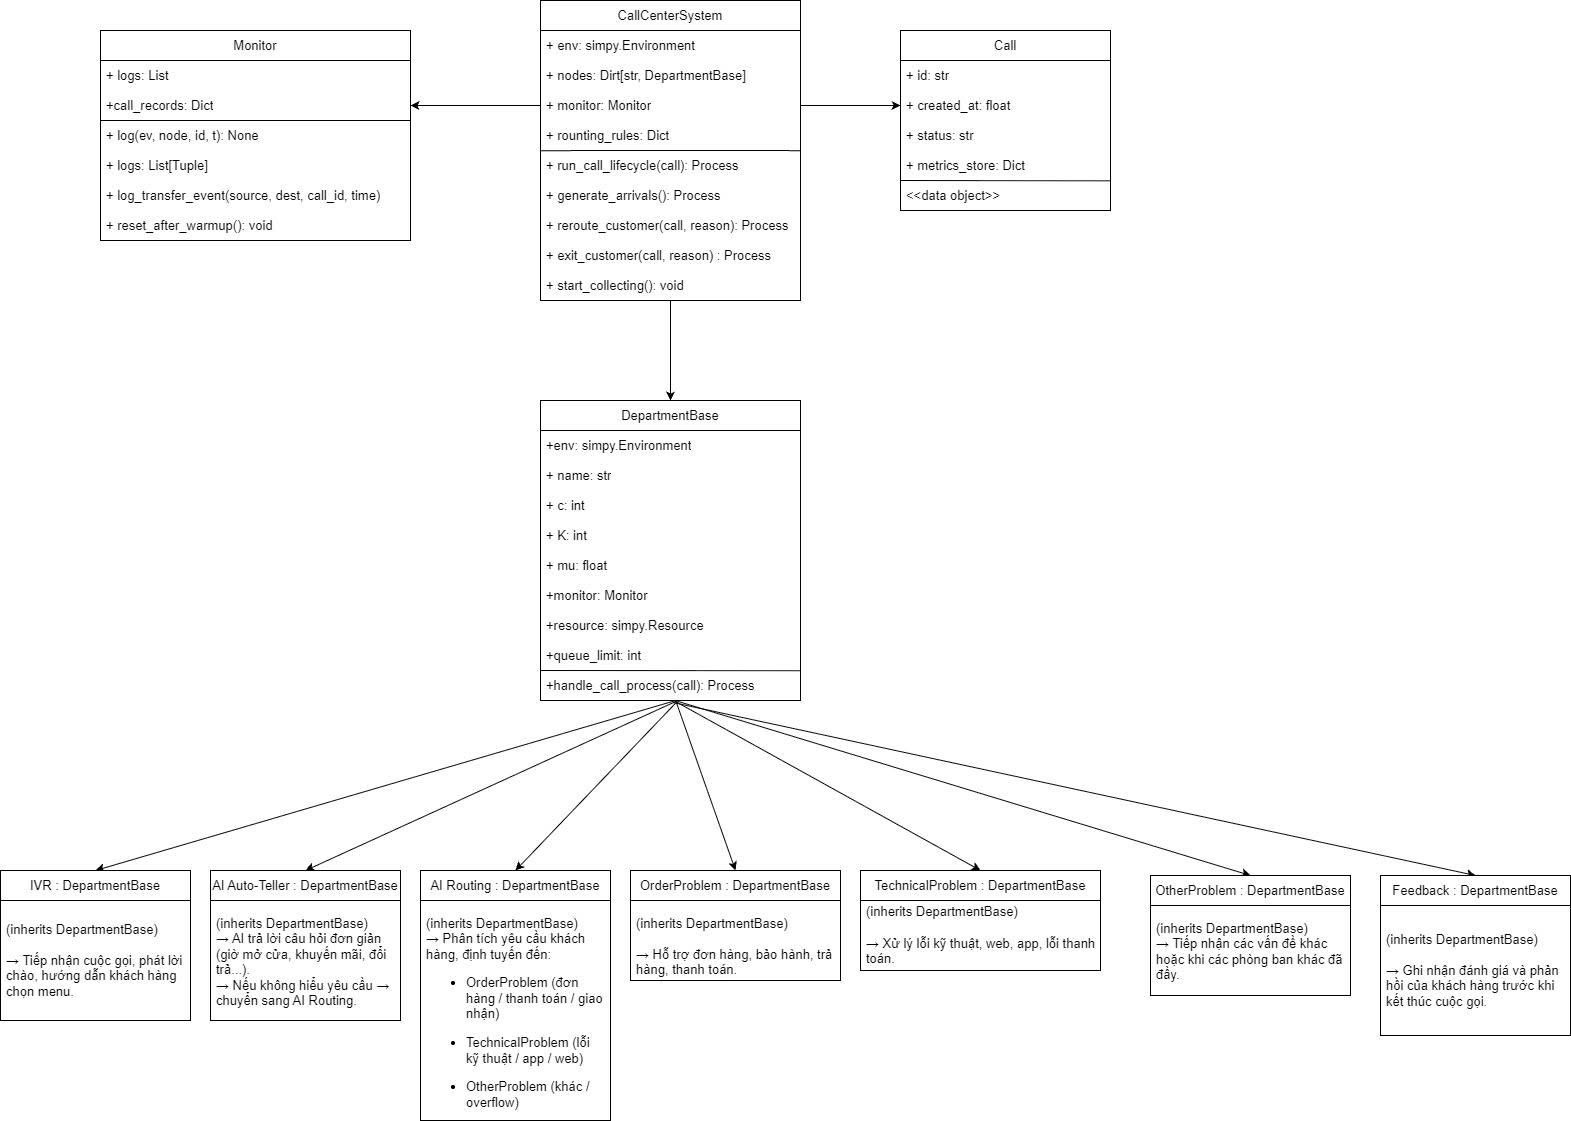

### 4. Định nghĩa Sơ đồ Lớp Hệ thống

Sơ đồ lớp của hệ thống tổng đài Phone Teller Simulation được chia thành 3 nhóm chức năng chính:
- Nhóm điều phối: bao gồm các lớp `CallCenterSystem`, `Monitor`, `Call`
- Nhóm hàng đợi: kế thừa từ `DepartmentBase`, gồm các lớp `IVR`, `AI_Auto_Teller`, `AI_Routing`, `OrderProblem`, `TechnicalProblem`, `OtherProblem`, `Feedback`



#### 4.1. Nhóm điều phối

Nhóm này bao gồm các lớp chịu trách nhiệm điều phối, ghi nhận và đại diện cho luồng xử lý cuộc gọi trong toàn bộ hệ thống.

**1. Lớp `CallCenterSystem`**

- Vai trò:
  - Là trung tâm điều phối chính của hệ thống tổng đài.
  - Quản lý toàn bộ vòng đời của các cuộc gọi – từ khi sinh ra đến khi rời khỏi hệ thống.
  - Kết nối và định tuyến giữa các tầng xử lý: `IVR → AI_Auto_Teller → AI_Routing → các phòng ban xử lý → Feedback`.

- Thuộc tính:
  - `env`: môi trường mô phỏng của SimPy.
  - `nodes: Dict[str, DepartmentBase]`: tập hợp các phòng ban (node) của hệ thống.
  - `monitor: Monitor`: bộ ghi nhận log và dữ liệu sự kiện.
  - `routing_rules: Dict`: bảng quy tắc định tuyến cuộc gọi giữa các tầng.

- Hàm:
  - `run_call_lifecycle(call)`: điều khiển toàn bộ hành trình của một cuộc gọi qua nhiều phòng ban.
  - `generate_arrivals()`: tạo luồng cuộc gọi đến theo phân phối Poisson.
  - `reroute_customer(call, from_station)`: xác định điểm đến tiếp theo của cuộc gọi dựa trên quy tắc định tuyến.
  - `exit_customer(call, reason)`: ghi nhận trạng thái và kết thúc vòng đời của cuộc gọi.



**2. Lớp `Monitor`**

- Vai trò:
  - Theo dõi và ghi nhận toàn bộ sự kiện trong quá trình mô phỏng.
  - Cung cấp dữ liệu thống kê và tính toán các KPI (Key Performance Indicators) của hệ thống.

- Thuộc tính:
  - `logs: List[Tuple]`: danh sách log các sự kiện (ví dụ: chuyển node, bắt đầu phục vụ, kết thúc, rớt cuộc gọi).
  - `call_records: Dict`: lưu thông tin chi tiết của từng cuộc gọi (thời gian, node đã đi qua, trạng thái cuối cùng).

- Hàm:
  - `log_transfer_event(source, dest, call_id, time)`: ghi nhận sự kiện chuyển cuộc gọi giữa hai node.
  - `log_call_status(call)`: cập nhật trạng thái cuộc gọi vào bảng thống kê.
  - `compute_kpis()`: tính toán các chỉ số tổng hợp như:
    - Số lượng sự kiện ghi nhận.
    - Tổng số cuộc gọi đã phục vụ.
    - Tỷ lệ xử lý thành công, tỷ lệ rớt cuộc gọi (drop rate).
    - Các chỉ tiêu L, Lq, W, Wq, ρ, SLA (nếu mở rộng).



**3. Lớp `Call`**

- Vai trò:
  Đại diện cho một cuộc gọi khách hàng trong mô phỏng.

- Thuộc tính:
  - `id`: mã định danh cuộc gọi.
  - `created_at`: thời điểm bắt đầu cuộc gọi.
  - `status`: trạng thái hiện tại của cuộc gọi (ví dụ: `"ivr_serving"`, `"exited:completed"`).
  - `metrics_store`: lưu trữ dữ liệu thống kê và lịch sử phục vụ của cuộc gọi.

- Hàm:
  - `<<data object>>`: lớp chỉ lưu dữ liệu, không chứa logic xử lý.



#### 4.2. Nhóm hàng đợi

**1. Lớp `DepartmentBase`**

- Vai trò:
  - Là lớp trừu tượng (abstract) mô hình hóa một tầng M/M/c/K trong hệ thống tổng đài.
  - Đại diện cho từng phòng ban phục vụ: IVR, AI, kỹ thuật, phản hồi,...
  - Quản lý số lượng agent phục vụ song song thông qua `simpy.Resource`.

- Thuộc tính:

| Thuộc tính | Kiểu dữ liệu | Mô tả |
| :--- | :--- | :--- |
| `env` | `simpy.Environment` | Môi trường mô phỏng SimPy. |
| `name` | `str` | Tên phòng ban / tầng phục vụ. |
| `c` | `int` | Số agent có thể phục vụ đồng thời. |
| `K` | `int` | Dung lượng tối đa (đang phục vụ + đang chờ). |
| `mu` ($\mu$) | `float` | Tốc độ phục vụ trung bình. |
| `monitor` | `Monitor` | Ghi log sự kiện tại node. |
| `resource` | `simpy.Resource` | Quản lý các agent (tự động cấp phát/bận/rảnh). |
| `queue_limit` | `int` | Giới hạn hàng đợi (nếu hàng đợi đầy → drop). |

- Hàm:
  - `handle_call_process(call)`: coroutine mô phỏng quá trình phục vụ một cuộc gọi tại node.
  - *(override ở các lớp con)* để đặc tả hành vi xử lý riêng từng loại phòng ban (ví dụ IVR phát lời chào, AI Routing định tuyến,…).


**2. Các lớp kế thừa từ `DepartmentBase`**

Tất cả các lớp sau kế thừa trực tiếp từ `DepartmentBase` và được tùy chỉnh tham số `c, K, μ` cũng như hành vi xử lý riêng:

| Lớp kế thừa | Vai trò cụ thể trong hệ thống Phone Teller |
| :--- | :--- |
| `IVR` | Tầng đầu tiên – tiếp nhận cuộc gọi, phát lời chào, hướng dẫn menu. Định tuyến đến `AI_Auto_Teller`. |
| `AI_Auto_Teller` | Xử lý các yêu cầu đơn giản bằng AI (giờ làm việc, chính sách, khuyến mãi). Nếu phức tạp → chuyển `AI_Routing`. |
| `AI_Routing` | Phân tích yêu cầu khách hàng, xác định phòng ban xử lý phù hợp (`OrderProblem`, `TechnicalProblem`, `OtherProblem`). |
| `OrderProblem` | Xử lý các vấn đề về đơn hàng, bảo hành, hoàn tiền, thanh toán. |
| `TechnicalProblem` | Xử lý các lỗi kỹ thuật, lỗi web/app, lỗi giao dịch. |
| `OtherProblem` | Xử lý các vấn đề không phân loại được hoặc làm hàng đợi dự phòng khi các node khác quá tải. |
| `Feedback` | Giai đoạn cuối – ghi nhận đánh giá, phản hồi của khách hàng sau khi kết thúc cuộc gọi. |



### 5. Quan hệ giữa các Lớp (Class Relationships)

| Quan hệ | Các lớp tham gia | Mô tả |
| :--- | :--- | :--- |
| Tổng hợp (Composition) | `CallCenterSystem` sở hữu 1 `Monitor` | `CallCenterSystem` sử dụng đối tượng `Monitor`  |
|||để ghi log toàn hệ thống.|
| Tổng hợp (Composition) | `CallCenterSystem` sở hữu nhiều `DepartmentBase` | Hệ thống quản lý các node phục vụ |
|||(IVR, AI Routing, OrderProblem, ...). |
| Phụ thuộc (Dependency) | `CallCenterSystem` → `Call` | Hệ thống điều phối và định tuyến đối tượng `Call`. |
| Kế thừa (Inheritance) | `IVR`, `AI_Auto_Teller`, `AI_Routing`, | Các node phục vụ đều chia sẻ cấu trúc M/M/c/K cơ bản. |
| | `OrderProblem`, `TechnicalProblem`, |  |
| | `OtherProblem`, `Feedback` kế thừa `DepartmentBase` |  |





# 3. System Implementation



Install prerequisite library


*   simpy



In [ ]:
# @title
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install simpy
!pip install joblib

Import required library

In [ ]:
# @title
import simpy
import random
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt
import seaborn as sns

Nhập dữ liệu đầu vào các thông số

In [ ]:
# @title
SIMULATION_TIME_HOURS = 1000
WARMUP = 300

ROUTING_MATRIX = np.array([
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.05, 0.00, 0.95, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.30, 0.00, 0.00, 0.70, 0.00, 0.00, 0.00, 0.00],
    [0.05, 0.00, 0.00, 0.00, 0.40, 0.30, 0.25, 0.00],
    [0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.10, 0.85],
    [0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.10, 0.85],
    [0.05, 0.00, 0.00, 0.10, 0.00, 0.00, 0.00, 0.85],
    [1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
])

STATION_NAME_TO_IDX = {
    "Source": 0, "IVR": 1, "Auto-Teller": 2, "AI Routing": 3,
    "Order": 4, "Technical": 5, "Other": 6, "Feedback": 7
}
IDX_TO_STATION_NAME = {v: k for k, v in STATION_NAME_TO_IDX.items()}

# ================================
# CẤU HÌNH CƠ BẢN CÁC TRẠM (MU, C, K)
# ================================
BASE_STATION_CONFIG = [
    # [Tên, Mu, C, K]
    ["IVR", 25, 3, 20],
    ["Auto-Teller", 23, 3, 20 ],
    ["AI Routing", 22, 3, 18],
    ["Order", 12, 2, 10],
    ["Technical", 12, 2, 10],
    ["Other", 15, 2, 10],
    ["Feedback", 25, 3, 18]
]

In [ ]:
# @title

# ================================
# HÀM TỰ ĐỘNG TÍNH LAMBDA TỪ SOURCE RATE
# ================================
def generate_workload_from_source_rate(source_rate, station_config_template, routing_matrix, name_to_idx):
    """
    Tính λ hiệu dụng cho các trạm nội bộ (IVR..Feedback) với giả sử:
    - Khách ngoại sinh chỉ vào IVR với rate = source_rate
    - Source (node 0) KHÔNG nằm trong mạng nội bộ dùng để giải hệ.
    """

    # Các node nội bộ chính là danh sách trạm trong BASE_STATION_CONFIG
    internal_indices = [name_to_idx[name] for name, _, _, _ in station_config_template]  # [1..7]
    n = len(internal_indices)

    # Ma trận P_int: lấy submatrix từ routing_matrix tương ứng các node 1..7
    P_int = routing_matrix[np.ix_(internal_indices, internal_indices)]

    # Giải (I - P_int^T) * λ_int = b_int
    I = np.eye(n)
    A = I - P_int.T

    b = np.zeros(n)
    # Giả sử tất cả khách ngoại sinh vào IVR
    ivr_global_idx = name_to_idx["IVR"]
    ivr_pos = internal_indices.index(ivr_global_idx)
    b[ivr_pos] = source_rate

    lambda_int = np.linalg.solve(A, b)

    # Map lại từ index toàn cục -> λ
    lam_map = {internal_indices[i]: lambda_int[i] for i in range(n)}

    # Tạo workload giống cũ
    workload = [[f"Source (λ={source_rate})", source_rate, 0, 0, 0]]
    for name, mu, c, k in station_config_template:
        idx = name_to_idx[name]
        lam = round(lam_map[idx], 2)  # cho đẹp, 2 chữ số sau dấu phẩy
        workload.append([name, lam, mu, c, int(k)])

    return workload


HỆ THỐNG

In [ ]:
# @title
# ================================
# LỚP CALL
# ================================
class Call:
    def __init__(self, call_id):
        self.id = call_id


# ================================
# LỚP MONITOR
# ================================
class Monitor:
    def __init__(self):
        self.total_calls_generated = 0
        self.total_calls_completed = 0
        self.total_calls_dropped = 0
        self.total_calls_dropped_by_station = defaultdict(int)
        self.collecting = False

        self.wait_times_data = defaultdict(list)
        self.service_times_data = defaultdict(list)

        self.time_points = []
        self.system_size = defaultdict(list)
        self.queue_size = defaultdict(list)



    def log_generated(self):
        if self.collecting:
            self.total_calls_generated += 1

    def log_complete(self):
        if self.collecting:
            self.total_calls_completed += 1

    def log_drop(self, station_name, call_id):
        if self.collecting:
            self.total_calls_dropped += 1
            self.total_calls_dropped_by_station[station_name] += 1

    def log_wait(self, station_name, wait_time):
        if self.collecting:
            self.wait_times_data[station_name].append(wait_time)

    def log_service(self, station_name, service_time):
        if self.collecting:
            self.service_times_data[station_name].append(service_time)

    def reset_after_warmup(self):
        self.total_calls_generated = 0
        self.total_calls_completed = 0
        self.total_calls_dropped = 0
        self.total_calls_dropped_by_station.clear()
        self.wait_times_data.clear()
        self.service_times_data.clear()
        self.time_points.clear()
        self.system_size.clear()
        self.queue_size.clear()

    def record_state(self, env, station_names):
        if not self.collecting:
            return
        t = env.now
        self.time_points.append(t)

        for name in station_names:
            safe_name = name.replace(" ", "_").replace("-", "_")
            station = getattr(env, f"station_{safe_name}", None)
            if station is None:
                continue
            serving = station.resource.count
            waiting = len(station.resource.queue)
            self.system_size[name].append(serving + waiting)
            self.queue_size[name].append(waiting)

    def calculate_simulation_kpis(self, sim_duration, stations_config, target_node=None):
        print("---" * 20)
        print(f"BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau {sim_duration} giờ)")
        print("---" * 20)

        # -------- KPI toàn hệ thống --------
        print(f"\n[KPI] Throughput: {self.total_calls_completed:,} cuộc gọi")
        drop_rate = (self.total_calls_dropped / self.total_calls_generated) if self.total_calls_generated > 0 else 0
        print(f"[KPI] Drop Rate: {drop_rate:.2%}")

        all_waits = [t for sub in self.wait_times_data.values() for t in sub]
        avg_wq_global = np.mean(all_waits) * 60 if all_waits else 0
        print(f"[KPI] W_q trung bình toàn hệ thống: {avg_wq_global:.3f} phút")

        print("\n--- Chi tiết từng trạm ---")
        print(f"{'Trạm':<15} {'L':<8} {'Lq':<8} {'W (phút)':<10} {'Wq (phút)':<12} {'Drop (%)':<12} {'Rho':<10}")
        print("-" * 95)

        # -----------------------------------------
        # 1) Lọc đúng dòng station trong config
        # -----------------------------------------
        if target_node is not None:
            # tìm dòng station đúng theo tên
            filtered_cfg = [cfg for cfg in stations_config[1:] if cfg[0] == target_node]
        else:
            # lấy tất cả station
            filtered_cfg = stations_config[1:]

        # -----------------------------------------
        # 2) Xử lý từng station (đúng format cfg)
        # -----------------------------------------
        for cfg in filtered_cfg:
            name = cfg[0]     # station name
            c = cfg[3]        # number of agents

            # -------- Wq --------
            waits = self.wait_times_data[name]
            avg_wq = np.mean(waits) * 60 if waits else 0  # phút

            # -------- Service Time --------
            services = self.service_times_data[name]
            avg_service = np.mean(services) * 60 if services else 0  # phút

            # -------- W (time in system) --------
            avg_W = avg_wq + avg_service

            # -------- Lq --------
            Lq_avg = np.mean(self.queue_size[name]) if self.queue_size[name] else 0

            # -------- L --------
            L_avg = np.mean(self.system_size[name]) if self.system_size[name] else 0

            # -------- Drop Rate --------
            drops = self.total_calls_dropped_by_station[name]
            arrivals = drops + len(waits)
            drop_rate_st = drops / arrivals * 100 if arrivals > 0 else 0

            # -------- Rho --------
            total_service = sum(services)  # giờ
            rho = total_service / (c * sim_duration) if c > 0 else 0

            print(f"{name:<15} {L_avg:<8.2f} {Lq_avg:<8.2f} {avg_W:<10.2f} {avg_wq:<12.2f} {drop_rate_st:<12.2f} {rho:<10.2%}")

# ================================
# LỚP SERVICE STATION
# ================================
class ServiceStation:
    def __init__(self, env, name, c, k, mu, monitor):
        self.env = env
        self.name = name
        self.c = c
        self.k = k
        self.mu = mu
        self.monitor = monitor
        self.resource = simpy.Resource(env, capacity=c)
        self.queue_limit = k - c if k > c else 0
        safe_name = name.replace(" ", "_").replace("-", "_")
        setattr(env, f"station_{safe_name}", self)

    def handle_call(self, call):
        if len(self.resource.queue) >= self.queue_limit:
            self.monitor.log_drop(self.name, call.id)
            return "REJECTED_QUEUE_FULL"

        with self.resource.request() as req:
            wait_start = self.env.now
            yield req
            wait_time = self.env.now - wait_start
            self.monitor.log_wait(self.name, wait_time)
            service_time = random.expovariate(self.mu)
            self.monitor.log_service(self.name, service_time)
            yield self.env.timeout(service_time)
        return "COMPLETED"

# ================================
# LỚP CALL CENTER
# ================================
class CallCenter:
    def __init__(self, env, workload_config, routing_matrix, name_to_idx, idx_to_name):
        self.env = env
        self.monitor = Monitor()
        self.routing_matrix = routing_matrix
        self.name_to_idx = name_to_idx
        self.idx_to_name = idx_to_name
        self.global_arrival_rate = workload_config[0][1]
        self.stations = {}
        for cfg in workload_config[1:]:
            name, _, mu, c, k = cfg
            self.stations[name] = ServiceStation(env, name, c, k, mu, self.monitor)
        self.station_names = [cfg[0] for cfg in workload_config[1:]]

    def start_collecting(self):
        self.monitor.collecting = True
        self.monitor.reset_after_warmup()

    def get_next_station_idx(self, cur_idx):
        return np.random.choice(len(self.routing_matrix[cur_idx]), p=self.routing_matrix[cur_idx])

    def run_call_lifecycle(self, call):
        cur_idx = 1  # Bắt đầu từ IVR
        while True:
            cur_name = self.idx_to_name[cur_idx]
            station = self.stations[cur_name]
            result = yield self.env.process(station.handle_call(call))

            if result == "COMPLETED":
                next_idx = self.get_next_station_idx(cur_idx)
            else:
                if cur_name in ["Order", "Technical"]:
                    other_res = yield self.env.process(self.stations["Other"].handle_call(call))
                    next_idx = self.name_to_idx["Feedback"] if other_res == "COMPLETED" else self.name_to_idx[
                        "AI Routing"]
                elif cur_name == "Other":
                    next_idx = self.name_to_idx["AI Routing"]
                else:
                    next_idx = 0
            if next_idx == 0:
                if result == "COMPLETED":
                    self.monitor.log_complete()
                break
            cur_idx = next_idx

    def generate_arrivals(self):
        cid = 0
        while True:
            yield self.env.timeout(random.expovariate(self.global_arrival_rate))
            cid += 1
            self.monitor.log_generated()
            self.env.process(self.run_call_lifecycle(Call(cid)))

    def monitor_system_state(self):
        while True:
            yield self.env.timeout(0.1)
            self.monitor.record_state(self.env, self.station_names)



Vẽ đồ thị

In [ ]:
# @title
# ================================
# VẼ ĐỒ THỊ
# ================================
def plot_L_Lq(monitor, title, target_node=None):
    plt.style.use('seaborn-v0_8')

    # --------------------------
    # Lấy danh sách node cần vẽ
    # --------------------------
    default_stations = ["IVR", "Auto-Teller", "AI Routing", "Order",
                        "Technical", "Other", "Feedback"]

    if target_node is not None:
        stations = [target_node]                   # chỉ vẽ 1 node
    else:
        stations = default_stations                # vẽ tất cả

    # --------------------------
    # Tạo figure tùy theo số node
    # --------------------------
    n = len(stations)
    fig, axs = plt.subplots(n, 1, figsize=(12, 4 * n))
    if n == 1:
        axs = [axs]  # bảo đảm axs là list

    fig.suptitle(f"L(t) và Lq(t) theo thoi gian – {title}", fontsize=18, fontweight='bold')
    times = np.array(monitor.time_points)

    # --------------------------
    # Vẽ từng node
    # --------------------------
    for ax, st in zip(axs, stations):
        if st in monitor.system_size and len(monitor.system_size[st]) > 0:
            ax.plot(times, monitor.system_size[st],
                    label="L(t) – trong he thong",
                    linewidth=1.2)

            ax.plot(times, monitor.queue_size[st],
                    label="Lq(t) – trong hang doi",
                    alpha=0.8,
                    linewidth=1.2)

        ax.set_title(st, fontweight='bold')
        ax.set_xlabel("Thoi gian (gio)")
        ax.set_ylabel("So cuoc goi")
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# @title
# ================================
# CÁC HÀM VẼ BIỂU ĐỒ RIÊNG LẺ
# ================================

def plot_throughput_chart(lambda_values, throughputs):

    plt.figure()
    plt.plot(lambda_values, throughputs, 'o-', color='#1f77b4', markersize=7, linewidth=2.5,
             markerfacecolor='white', markeredgewidth=1.5, label='Throughput')
    plt.title('Throughput vs Arrival Rate', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Arrival Rate λ (calls/hour)', fontsize=14)
    plt.ylabel('Throughput (calls/hour)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_response_time_chart(lambda_values, response_times):

    plt.figure()
    plt.plot(lambda_values, response_times, 'o-', color='#ff7f0e', markersize=7, linewidth=2.5,
             markerfacecolor='white', markeredgewidth=1.5, label='Response Time')
    plt.title('Response Time vs Arrival Rate', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Arrival Rate λ (calls/hour)', fontsize=14)
    plt.ylabel('Response Time (minutes)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_drop_rate_chart(lambda_values, drop_rates):

    plt.figure()
    plt.plot(lambda_values, drop_rates, 'o-', color='#d62728', markersize=7, linewidth=2.5,
             markerfacecolor='white', markeredgewidth=1.5, label='Drop Rate')
    plt.title('Drop Rate vs Arrival Rate', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Arrival Rate λ (calls/hour)', fontsize=14)
    plt.ylabel('Drop Rate (%)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_utilization_chart(lambda_values, rho_by_station):

    station_names = ["IVR", "Auto-Teller", "AI Routing", "Order", "Technical", "Other", "Feedback"]

    plt.figure(figsize=(12, 6))
    for st in station_names:
        if st in rho_by_station:
            plt.plot(lambda_values, rho_by_station[st], '-o', markersize=5, linewidth=1.8, label=st)

    plt.title('Utilization ρ for each node Arrival Rate λ', fontsize=18, fontweight='bold')
    plt.xlabel('Arrival Rate λ (calls/hour)', fontsize=14)
    plt.ylabel('ρ (Utilization)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_wait_time_distribution(wait_times, last_lambda):

    if not wait_times:
        print("Không có dữ liệu thời gian chờ để vẽ")
        return

    plt.figure(figsize=(10, 5))
    sns.histplot(wait_times, bins=40, kde=True, color="purple")
    plt.title(f"Distribution of customer waiting times at λ = {last_lambda:.1f}")
    plt.xlabel("waitting time (min/sec)")
    plt.ylabel("number of customers")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



Chạy mô phỏng

In [ ]:
# @title
def run_simulation(workload, label):
    print(f"\n{'=' * 60}")
    print(f"{' BẮT ĐẦU ' + label + ' ':^58}")
    print(f"{'=' * 60}\n")

    random.seed(42)
    np.random.seed(42)

    env = simpy.Environment()
    cc = CallCenter(env, workload, ROUTING_MATRIX, STATION_NAME_TO_IDX, IDX_TO_STATION_NAME)

    env.process(cc.generate_arrivals())
    env.process(cc.monitor_system_state())

    env.run(until=WARMUP)
    cc.start_collecting()
    env.run(until=WARMUP + SIMULATION_TIME_HOURS)

    print(f"{' KẾT THÚC ' + label + ' ':^58}")

    return cc.monitor

rates = [30, 100]
results = {}

for rate in rates:
    workload = generate_workload_from_source_rate(rate, BASE_STATION_CONFIG, ROUTING_MATRIX, STATION_NAME_TO_IDX)
    print(workload)
    results[rate] = run_simulation(workload, f"Workload {rate} calls/h")






[['Source (λ=30)', 30, 0, 0, 0], ['IVR', np.float64(30.0), 25, 3, 20], ['Auto-Teller', np.float64(28.5), 23, 3, 20], ['AI Routing', np.float64(20.61), 22, 3, 18], ['Order', np.float64(8.24), 12, 2, 10], ['Technical', np.float64(6.18), 12, 2, 10], ['Other', np.float64(6.6), 15, 2, 10], ['Feedback', np.float64(17.87), 25, 3, 18]]

               BẮT ĐẦU Workload 30 calls/h                

               KẾT THÚC Workload 30 calls/h               
[['Source (λ=100)', 100, 0, 0, 0], ['IVR', np.float64(100.0), 25, 3, 20], ['Auto-Teller', np.float64(95.0), 23, 3, 20], ['AI Routing', np.float64(68.7), 22, 3, 18], ['Order', np.float64(27.48), 12, 2, 10], ['Technical', np.float64(20.61), 12, 2, 10], ['Other', np.float64(21.98), 15, 2, 10], ['Feedback', np.float64(59.56), 25, 3, 18]]

               BẮT ĐẦU Workload 100 calls/h               

              KẾT THÚC Workload 100 calls/h               


## Queuing Node 1: IVR

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 29,930 cuộc gọi
[KPI] Drop Rate: 0.00%
[KPI] W_q trung bình toàn hệ thống: 0.216 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
IVR             1.30     0.11     2.60       0.21         0.00         39.81%    


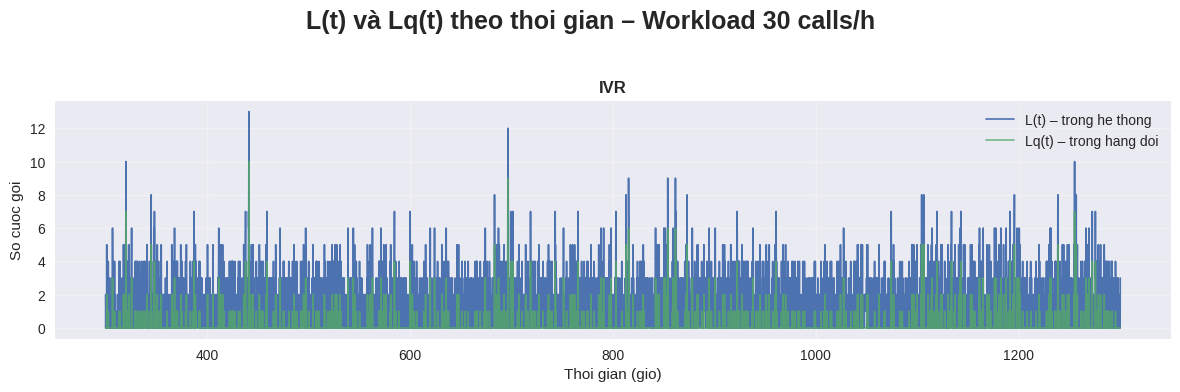

In [ ]:
# @title
rate_1 = 30
monitor = results[rate_1]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="IVR")
plot_L_Lq(results[30], f"Workload {rate_1} calls/h", target_node="IVR")



**Nhận xét:** L(t) dao động trong khoảng 0–5 và Lq(t) chỉ xuất hiện ở mức thấp. Điều này cho thấy IVR xử lý nhanh, hàng đợi ngắn và hầu như không gây tắc nghẽn.


------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 70,034 cuộc gọi
[KPI] Drop Rate: 30.25%
[KPI] W_q trung bình toàn hệ thống: 5.847 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
IVR             17.05    14.05    13.64      11.24        24.76        99.90%    


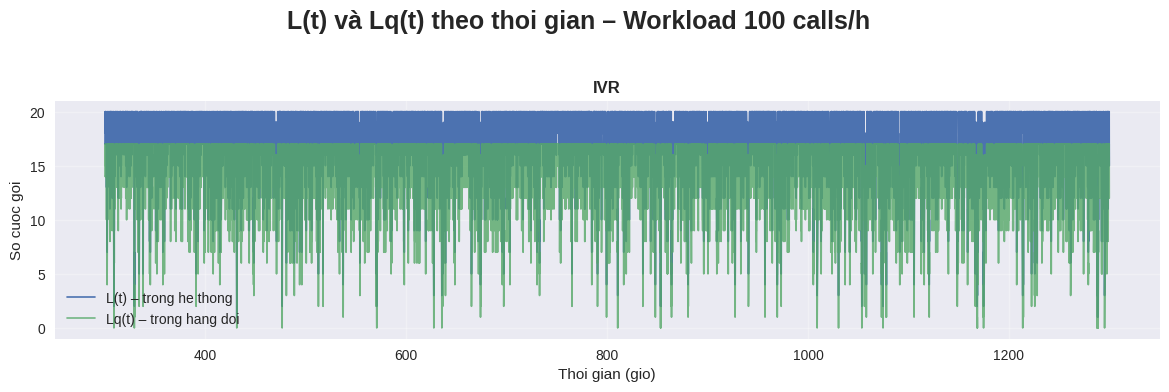

In [ ]:
# @title
rate_2 = 100
monitor = results[rate_2]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="IVR")
plot_L_Lq(results[rate_2], f"Workload {rate_2} calls/h", target_node="IVR")

**Nhận xét:**
L(t) gần như chạm trần liên tục (dao động quanh 17–20).
 Lq(t) rất dày → hàng đợi luôn đầy hoặc gần đầy.
 Đây là dấu hiệu IVR đang hoạt động vượt khả năng phục vụ (ρ > 1)
nên IVR trở thành bottleneck rõ ràng khi λ = 100.



## Queuing node 2: Auto-Teller


------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 29,930 cuộc gọi
[KPI] Drop Rate: 0.00%
[KPI] W_q trung bình toàn hệ thống: 0.216 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Auto-Teller     1.35     0.11     2.86       0.24         0.00         41.51%    


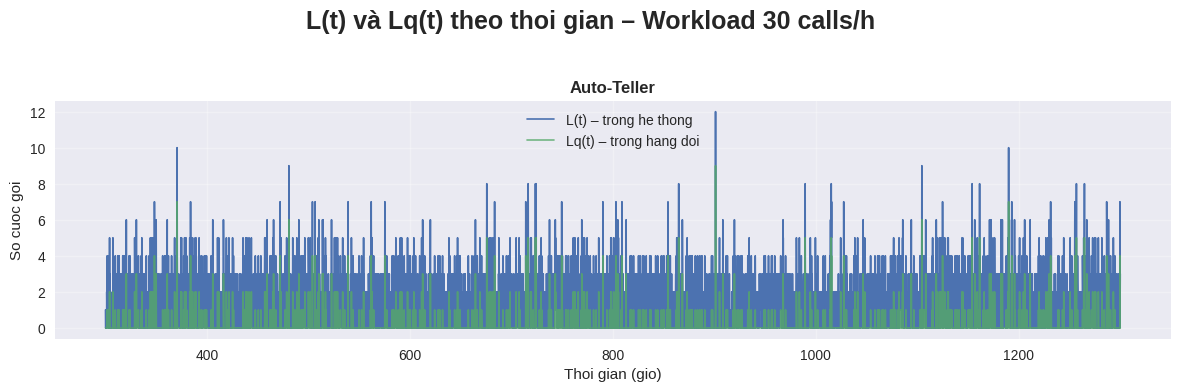

In [ ]:
# @title
rate_1 = 30
monitor = results[rate_1]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Auto-Teller")
plot_L_Lq(results[30], f"Workload {rate_1} calls/h", target_node="Auto-Teller")



**Nhận xét:** L(t) và Lq(t) có dạng dao động tương tự IVR, chủ yếu ở mức thấp. Auto-Teller hoạt động ổn định, khả năng phục vụ đủ lớn so với tải.

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 70,034 cuộc gọi
[KPI] Drop Rate: 30.25%
[KPI] W_q trung bình toàn hệ thống: 5.847 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Auto-Teller     11.68    8.79     10.57      7.96         6.87         96.44%    


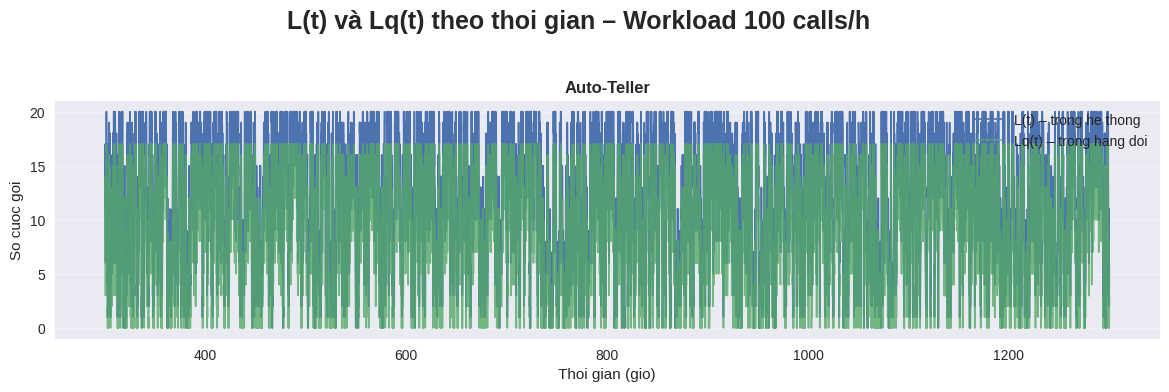

In [ ]:
# @title
rate_2 = 100
monitor = results[rate_2]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Auto-Teller")
plot_L_Lq(results[rate_2], f"Workload {rate_2} calls/h", target_node="Auto-Teller")

**Nhận xét:**
L(t) bám sát mức tối đa (khoảng 17–20).
 Tần suất xuất hiện Lq(t) dày đặc, chứng tỏ tải nặng.
 Tuy không nghẽn nặng như IVR, nhưng vẫn vận hành trong trạng thái quá tải nên Auto-Teller bị bão hòa, hàng đợi thường xuyên đầy.


## Queuing node 3: AI Routing

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 29,930 cuộc gọi
[KPI] Drop Rate: 0.00%
[KPI] W_q trung bình toàn hệ thống: 0.216 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
AI Routing      0.99     0.04     2.89       0.12         0.00         31.65%    


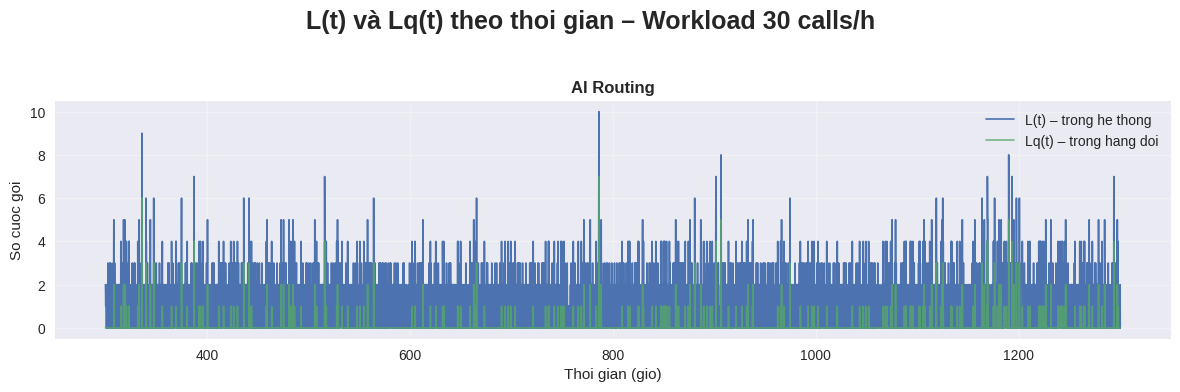

In [ ]:
# @title
rate_1 = 30
monitor = results[rate_1]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="AI Routing")
plot_L_Lq(results[30], f"Workload {rate_1} calls/h", target_node="AI Routing")

**Nhận xét:** L(t) cao hơn các node trước, dao động rộng 0–2. Lq(t) xuất hiện thường xuyên hơn, phản ánh đây là điểm tập trung lưu lượng và nhạy tải nhất trong hệ thống, dù chưa đến mức nghẽn, hệ thống vẫn mượt mà

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 70,034 cuộc gọi
[KPI] Drop Rate: 30.25%
[KPI] W_q trung bình toàn hệ thống: 5.847 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
AI Routing      3.44     1.26     4.31       1.59         0.05         72.49%    


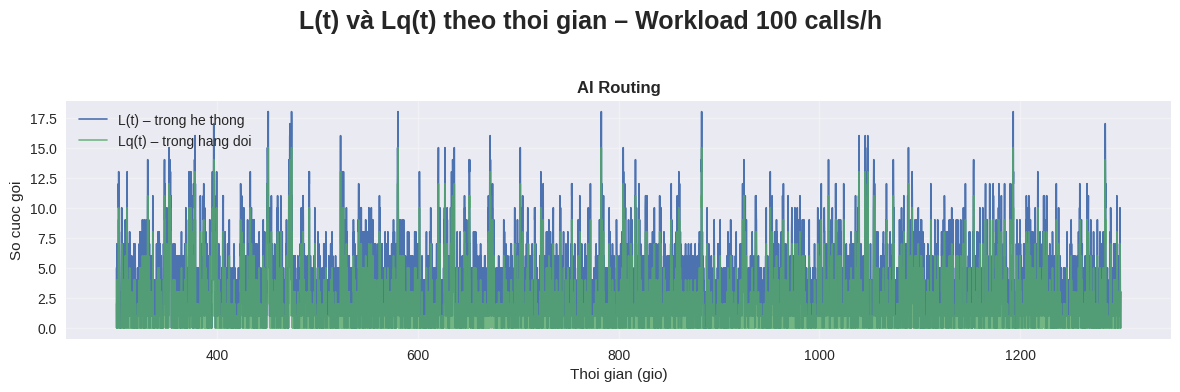

In [ ]:
# @title
rate_2 = 100
monitor = results[rate_2]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="AI Routing")
plot_L_Lq(results[rate_2], f"Workload {rate_2} calls/h", target_node="AI Routing")

**Nhận xét:**
L(t) dao động 5–15 và luôn ở vùng cao hơn.
 Lq(t) xuất hiện liên tục với mật độ dày hơn workload 30 rất nhiều.
 AI Routing có thể sẽ quá tải vì mọi cuộc gọi đều phải đi qua node này nên AI Routing là điểm nghẽn trung tâm khi workload tăng.


## Queuing node 4: Order


------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 29,930 cuộc gọi
[KPI] Drop Rate: 0.00%
[KPI] W_q trung bình toàn hệ thống: 0.216 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Order           0.78     0.10     5.77       0.73         0.00         34.51%    


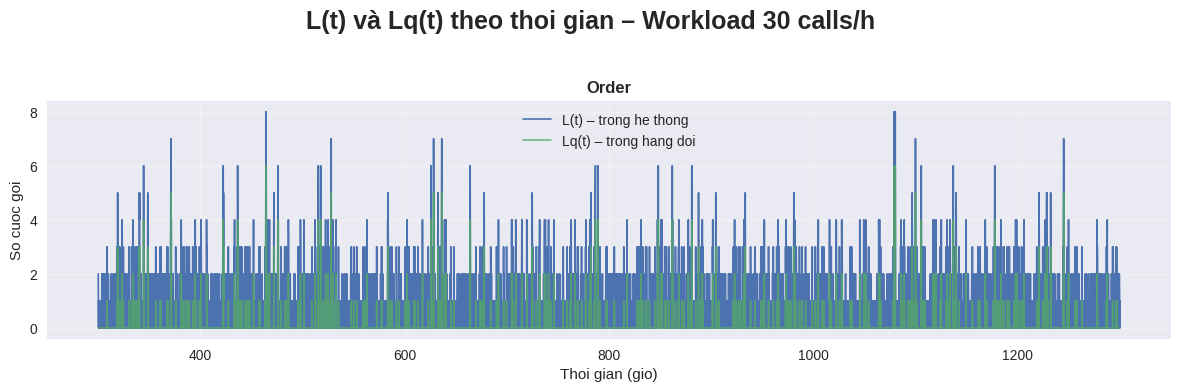

In [ ]:
# @title
rate_1 = 30
monitor = results[rate_1]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Order")
plot_L_Lq(results[30], f"Workload {rate_1} calls/h", target_node="Order")

**Nhận xét:** L(t) thấp (0–3) và Lq(t) chỉ tăng nhẹ trong một số thời điểm. Khối Order có mức tải nhẹ và duy trì trạng thái ổn định. Đây là node có dấu hiệu backlog rõ nhất trong workload 30. Có khả năng trở thành bottleneck khi tăng tải.

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 70,034 cuộc gọi
[KPI] Drop Rate: 30.25%
[KPI] W_q trung bình toàn hệ thống: 5.847 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Order           3.34     1.77     10.61      5.63         2.58         78.18%    


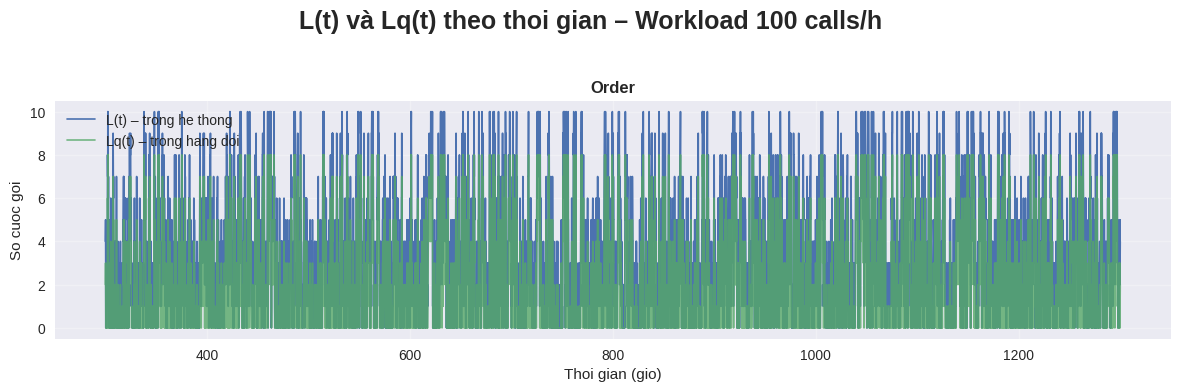

In [ ]:
# @title
rate_2 = 100
monitor = results[rate_2]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Order")
plot_L_Lq(results[rate_2], f"Workload {rate_2} calls/h", target_node="Order")

**Nhận xét:**
L(t) dao động quanh 5–10.
 Lq(t) xuất hiện nhiều và thường xuyên lớn hơn 5.
 Điều này phản ánh Order liên tục bị đẩy thêm khách từ AI Routing và từ Technical fallback nên Order trở nên dần quá tải và tích lũy hàng đợi rõ rệt.


## Queuing node 5: Technical

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 29,930 cuộc gọi
[KPI] Drop Rate: 0.00%
[KPI] W_q trung bình toàn hệ thống: 0.216 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Technical       0.56     0.03     5.41       0.34         0.00         26.34%    


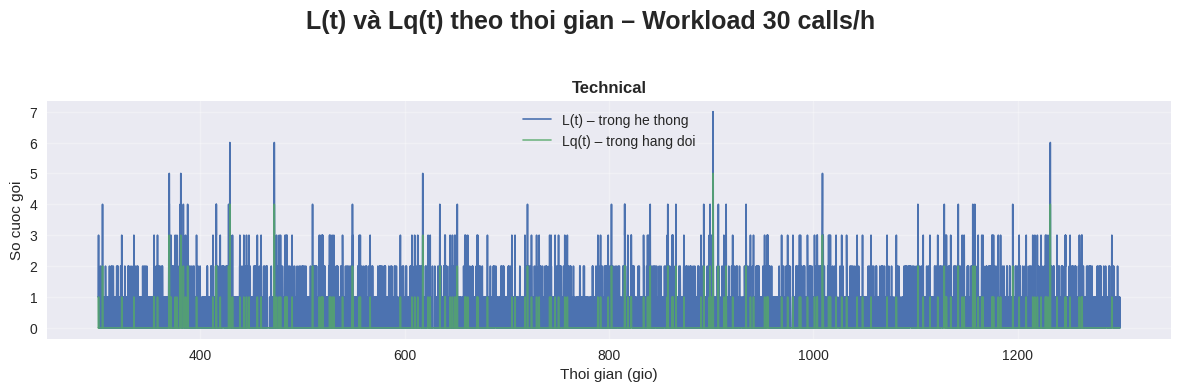

In [ ]:
# @title
rate_1 = 30
monitor = results[rate_1]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Technical")
plot_L_Lq(results[30], f"Workload {rate_1} calls/h", target_node="Technical")

**Nhận xét:** L(t) dao động 0–4 và Lq(t) nhiều thời điểm tăng lên 5–7. Hệ thống vẫn hoạt động mượt mà

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 80,620 cuộc gọi
[KPI] Drop Rate: 19.24%
[KPI] W_q trung bình toàn hệ thống: 2.151 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Technical       2.00     0.75     6.45       2.43         0.18         62.08%    


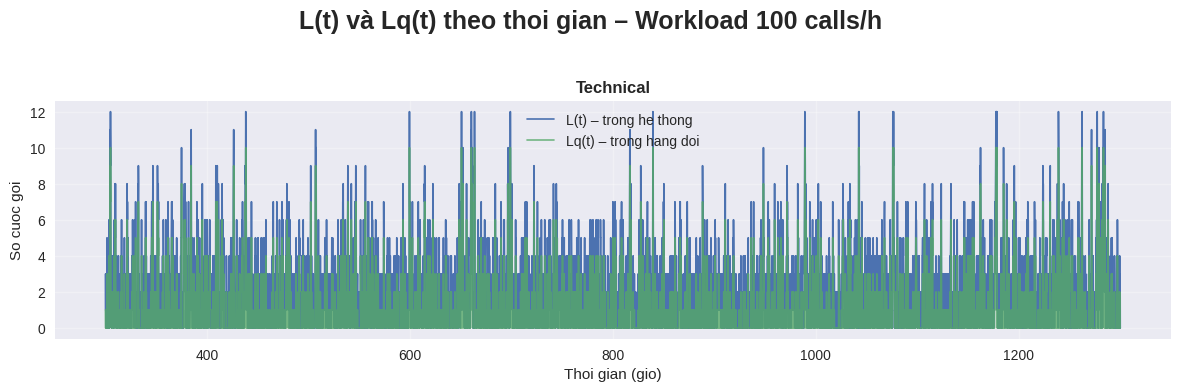

In [ ]:
# @title
rate_2 = 100
monitor = results[rate_2]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Technical")
plot_L_Lq(results[rate_2], f"Workload {rate_2} calls/h", target_node="Technical")

**Nhận xét:**
L(t) gần như luôn từ 3–12.
 Lq(t) dày, nhiều điểm chạm mức tối đa, có dấu hiệu backlog kéo dài.
 Thời gian L(t) và Lq(t) tăng rõ rệt so với workload 30


## Queuing node 6: Other

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 29,930 cuộc gọi
[KPI] Drop Rate: 0.00%
[KPI] W_q trung bình toàn hệ thống: 0.216 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Other           0.46     0.02     4.23       0.20         0.00         21.95%    


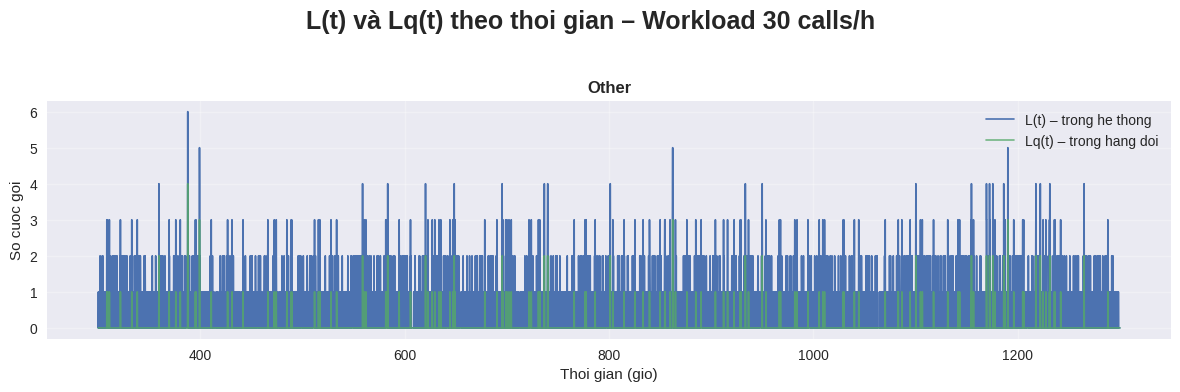

In [ ]:
# @title
rate_1 = 30
monitor = results[rate_1]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Other")
plot_L_Lq(results[30], f"Workload {rate_1} calls/h", target_node="Other")

**Nhận xét:** L(t) dao động trong mức 1–4, Lq(t) thấp hơn Technical. Node này đóng vai trò hàng đợi dự phòng và hoạt động ổn định.

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 70,034 cuộc gọi
[KPI] Drop Rate: 30.25%
[KPI] W_q trung bình toàn hệ thống: 5.847 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Other           1.51     0.45     5.71       1.68         0.17         53.42%    


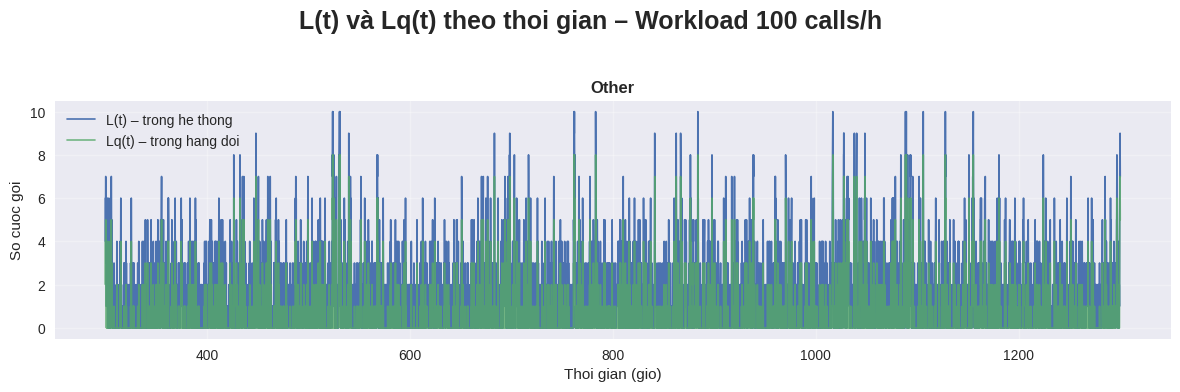

In [ ]:
rate_2 = 100
monitor = results[rate_2]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Other")
plot_L_Lq(results[rate_2], f"Workload {rate_2} calls/h", target_node="Other")

**Nhận xét:**
L(t) dao động 5–9, và Lq(t) xuất hiện với mật độ cao.
 Vì Other là hàng đợi dự phòng, khi Order hoặc Technical đầy thì lượng khách đổ sang nhiều khiến node này cũng quá tải nên Other tiệm cận bão hòa vì gánh tải đổ về từ các node chính.


## Queuing node 7: Feedback

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 29,930 cuộc gọi
[KPI] Drop Rate: 0.00%
[KPI] W_q trung bình toàn hệ thống: 0.216 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Feedback        0.72     0.01     2.40       0.03         0.00         23.53%    


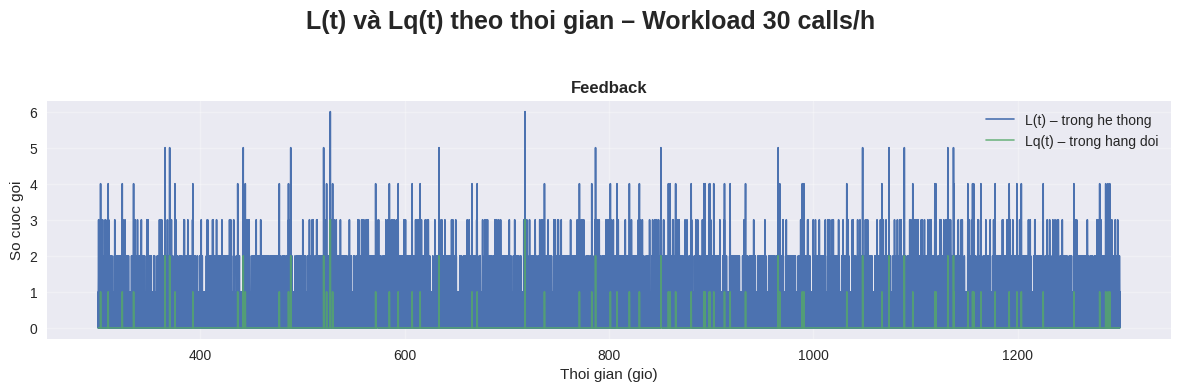

In [ ]:
rate_1 = 30
monitor = results[rate_1]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Feedback")
plot_L_Lq(results[30], f"Workload {rate_1} calls/h", target_node="Feedback")

**Nhận xét:** L(t) chủ yếu trong khoảng 3–9 và Lq(t) thấp. Feedback xử lý đều, không tích lũy khách chờ.

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 70,034 cuộc gọi
[KPI] Drop Rate: 30.25%
[KPI] W_q trung bình toàn hệ thống: 5.847 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
Feedback        2.05     0.36     2.94       0.52         0.00         56.23%    


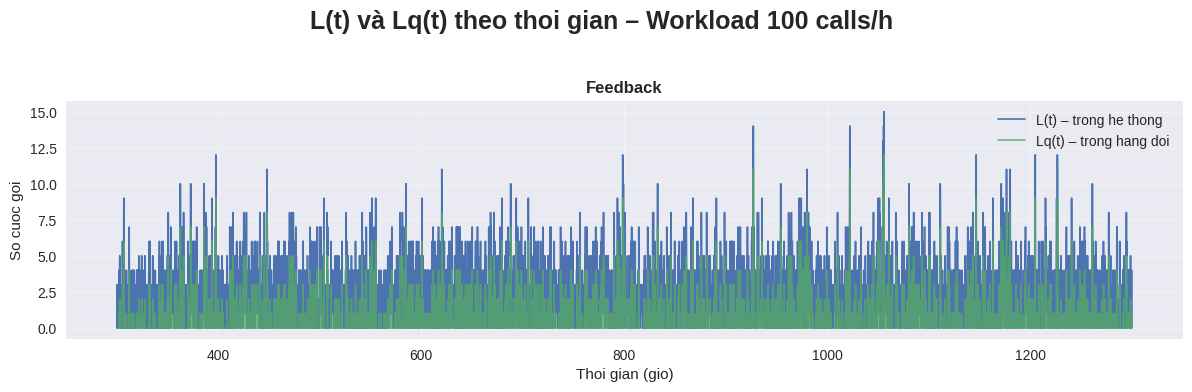

In [ ]:
rate_2 = 100
monitor = results[rate_2]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node="Feedback")
plot_L_Lq(results[rate_2], f"Workload {rate_2} calls/h", target_node="Feedback")

**Nhận xét:**
L(t) ổn định hơn so với các node khác nhưng vẫn cao (5–10).
 Lq(t) hiện diện dày đặc.
 Feedback không gây nghẽn chính nhưng vẫn hoạt động trong điều kiện tải nặng nên Feedback chịu tải cao nhưng không phải bottleneck chính.


**Nhận xét tổng quan toàn hệ thống:**

1. Với workload 30 calls/h, toàn hệ thống vận hành ổn định. Không node nào rơi vào trạng thái nghẽn kéo dài. AI Routing và Technical là hai node nhạy tải nhất; các node còn lại duy trì hàng chờ ngắn và không xuất hiện backlog đáng kể. Tất cả các node đều duy trì số lượng cuộc gọi trong hệ thống ở mức thấp, không xuất hiện hiện tượng nghẽn hoặc tích lũy hàng đợi kéo dài. Đặc biệt, giá trị Lq(t) gần như tiệm cận bằng 0 tại toàn bộ các trạm, cho thấy thời gian chờ của khách hàng rất nhỏ và không ảnh hưởng đến chất lượng dịch vụ.

2. Với workload 100 calls/h, Hầu hết các node đều vận hành trong tình trạng quá tải, L(t) và Lq(t) liên tục nằm ở mức cao.
IVR, Auto-Teller, AI Routing, Technical là nhóm nghẽn nặng nhất (ρ > 1).
Order và Other bị ảnh hưởng gián tiếp từ AI Routing và Technical, dẫn tới backlog kéo dài.
Hệ thống không ổn định ở mức tải 100, biểu hiện qua:
- Hàng đợi dày
- Dao động sát mức K liên tục
- Hầu như không có khoảng rảnh server

Đây là mô hình bão hòa (saturation): số lượng khách chờ tăng mạnh theo thời gian, đúng như kỳ vọng lý thuyết khi λ lớn hơn khả năng phục vụ tổng của mạng M/M/c/K.





# 4. Present results

Experiment 1

In [ ]:
# @title
# === THÍ NGHIỆM 1: WORKLOAD A ===

rate_1 = 30
monitor = results[rate_1]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node=None)

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 29,930 cuộc gọi
[KPI] Drop Rate: 0.00%
[KPI] W_q trung bình toàn hệ thống: 0.216 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
IVR             1.30     0.11     2.60       0.21         0.00         39.81%    
Auto-Teller     1.35     0.11     2.86       0.24         0.00         41.51%    
AI Routing      0.99     0.04     2.89       0.12         0.00         31.65%    
Order           0.78     0.10     5.77       0.73         0.00         34.51%    
Technical       0.56     0.03     5.41       0.34         0.00         26.34%    
Other           0.46     0.02     4.23       0.20         0.00         21.95%    
Feedback        0.72     0.01     2

Experiment 2

In [ ]:
# @title
# === THÍ NGHIỆM 2: WORKLOAD B ===

rate_2 = 100
monitor = results[rate_2]
monitor.calculate_simulation_kpis(SIMULATION_TIME_HOURS, workload, target_node=None)

------------------------------------------------------------
BÁO CÁO KẾT QUẢ MÔ PHỎNG (Sau 1000 giờ)
------------------------------------------------------------

[KPI] Throughput: 70,034 cuộc gọi
[KPI] Drop Rate: 30.25%
[KPI] W_q trung bình toàn hệ thống: 5.847 phút

--- Chi tiết từng trạm ---
Trạm            L        Lq       W (phút)   Wq (phút)    Drop (%)     Rho       
-----------------------------------------------------------------------------------------------
IVR             17.05    14.05    13.64      11.24        24.76        99.90%    
Auto-Teller     11.68    8.79     10.57      7.96         6.87         96.44%    
AI Routing      3.44     1.26     4.31       1.59         0.05         72.49%    
Order           3.34     1.77     10.61      5.63         2.58         78.18%    
Technical       1.84     0.63     7.66       2.61         0.17         60.68%    
Other           1.51     0.45     5.71       1.68         0.17         53.42%    
Feedback        2.05     0.36     

# 5. Conclusions

#### 5.1. Theoretical Calculation for M/M/c/K

In [ ]:
# @title
# ================================
# TÍNH TOÁN LÝ THUYẾT
# ================================
def print_theoretical_tables(workload):
    print("\n" + "="*80)
    print(f" BẢNG THÔNG SỐ TRẠM – Workload {workload[0][1]} calls/h ".center(80))
    print("="*80)

    # Bảng 1 – Thông số trạm
    print(f"{'Nút':<3} {'Mô tả':<15} {'λ (req/h)':<12} {'μ (req/h)':<12} {'c':<5} {'K':<5}")
    print("-"*80)

    for i, cfg in enumerate(workload[1:], start=1):
        name, lam, mu, c, k = cfg
        print(f"{i:<3} {name:<15} {lam:<12.2f} {mu:<12.2f} {c:<5} {k:<5}")

    print("\n" + "="*80)
    print(f" BẢNG HIỆU SUẤT HỆ THỐNG – Workload {workload[0][1]} calls/h ".center(80))
    print("="*80)

    # Bảng 2 – Performance Metrics
    print(f"{'Nút':<3} {'ρi':<8} {'P0i (%)':<10} {'Pki (%)':<10} "
          f"{'Li':<10} {'Lqi':<10} {'λei':<10} {'Wqi (phút)':<15} {'Wsi (phút)':<15} {'Ui':<10}")
    print("-"*120)

    L_total = 0.0   # tổng L của tất cả node

    for i, cfg in enumerate(workload[1:], start=1):
        name, lam, mu, c, k = cfg
        if lam <= 0:
            continue

        rho = lam / mu
        r = lam / mu

        # --- P0 ---
        sum1 = sum((r ** n) / math.factorial(n) for n in range(c))
        sum2 = (r ** c / math.factorial(c)) * sum((r / c) ** (n - c) for n in range(c, k + 1))
        p0 = 1 / (sum1 + sum2)

        # --- Pk ---
        pk = ((r ** k) / (math.factorial(c) * (c ** (k - c)))) * p0

        # --- Li ---
        Li = sum(
            n * ((r**n / math.factorial(n)) * p0 if n < c
                 else (r**n / (math.factorial(c) * c**(n-c))) * p0)
            for n in range(k+1)
        )

        # --- Lqi ---
        Lqi = sum((n - c) *
                  (r**n / (math.factorial(c) * c**(n-c))) * p0
                  for n in range(c, k+1))

        # --- λei ---
        lam_e = lam * (1 - pk)

        # --- Wqi, Wsi ---
        Wqi = (Lqi / lam_e) * 60 if lam_e > 0 else 0
        Wsi = (Li / lam_e) * 60 if lam_e > 0 else 0

        # --- Ui ---
        Ui = (Li - Lqi) / c if c > 0 else 0.0

        # cộng L_i vào tổng L toàn hệ thống
        L_total += Li

        # In dòng kết quả
        print(f"{i:<3} {rho:<8.4f} {p0*100:<10.3f} {pk*100:<10.3f} "
              f"{Li:<10.4f} {Lqi:<10.4f} {lam_e:<10.3f} {Wqi:<15.4f} "
              f"{Wsi:<15.4f} {Ui:<10.4f}")

    # ===============================
    # Little’s Law cho toàn hệ thống
    # ===============================
    lambda_system = workload[0][1]  # λ_source

    print("\n--- Thời gian trung bình toàn hệ thống (Little’s Law) ---")
    print(f"Tổng L của tất cả node: {L_total:.4f}")
    print(f"λ hệ thống (từ Source): {lambda_system:.2f}")

    if lambda_system > 0:
        W_system = L_total / lambda_system
        print(f"W = L_total / λ = {W_system:.4f} giờ  (~ {W_system*60:.2f} phút)")
    else:
        print("Không tính được vì λ hệ thống = 0")


In [ ]:
rate= 30

workload = generate_workload_from_source_rate(rate, BASE_STATION_CONFIG, ROUTING_MATRIX, STATION_NAME_TO_IDX)
#run_simulation(workload, f"Workload {rate} calls/h")
#calculate_theoretical_kpis(workload)
print_theoretical_tables(workload)


                    BẢNG THÔNG SỐ TRẠM – Workload 30 calls/h                    
Nút Mô tả           λ (req/h)    μ (req/h)    c     K    
--------------------------------------------------------------------------------
1   IVR             30.00        25.00        3     20   
2   Auto-Teller     28.50        23.00        3     20   
3   AI Routing      20.61        22.00        3     18   
4   Order           8.24         12.00        2     10   
5   Technical       6.18         12.00        2     10   
6   Other           6.60         15.00        2     10   
7   Feedback        17.87        25.00        3     18   

                 BẢNG HIỆU SUẤT HỆ THỐNG – Workload 30 calls/h                  
Nút ρi       P0i (%)    Pki (%)    Li         Lqi        λei        Wqi (phút)      Wsi (phút)      Ui        
------------------------------------------------------------------------------------------------------------------------
1   1.2000   29.412     0.000      1.2941     0.0941     30

In [ ]:
rate_1= 100

workload = generate_workload_from_source_rate(rate_1, BASE_STATION_CONFIG, ROUTING_MATRIX, STATION_NAME_TO_IDX)
#run_simulation(workload, f"Workload {rate} calls/h")
#calculate_theoretical_kpis(workload)
print_theoretical_tables(workload)


                   BẢNG THÔNG SỐ TRẠM – Workload 100 calls/h                    
Nút Mô tả           λ (req/h)    μ (req/h)    c     K    
--------------------------------------------------------------------------------
1   IVR             100.00       25.00        3     20   
2   Auto-Teller     95.00        23.00        3     20   
3   AI Routing      68.70        22.00        3     18   
4   Order           27.48        12.00        2     10   
5   Technical       20.61        12.00        2     10   
6   Other           21.98        15.00        2     10   
7   Feedback        59.56        25.00        3     18   

                 BẢNG HIỆU SUẤT HỆ THỐNG – Workload 100 calls/h                 
Nút ρi       P0i (%)    Pki (%)    Li         Lqi        λei        Wqi (phút)      Wsi (phút)      Ui        
------------------------------------------------------------------------------------------------------------------------
1   4.0000   0.018      25.084     17.0663    14.0696    74

**Nhận xét:** Ta có thể thấy, giữa kết quả tính toán và kết quả chạy mô phỏng có giá trị gần như tương đương nhau, sự tương đồng này cho thấy mô hình đã được xây dựng chính xác và code đã được triển khai một cách hiệu quả

##Các biểu đồ toàn hệ thống

In [ ]:
# @title
# ================================
# CHẠY CHƯƠNG TRÌNH
# ================================

# -------- Phân tích hiệu năng toàn bộ --------
lambda_values = np.linspace(10, 200, 20)
simulation_hours=300
warmup_hours=200

throughputs = []
response_times = []
drop_rates = []

print("\n" + "=" * 80)
print("CHẠY MÔ PHỎNG PHÂN TÍCH HIỆU NĂNG")
print("=" * 80)

# -------- PHASE 1: Collect KPIs across lambda values --------
print("PHASE 1: Thu thập KPI cho các giá trị λ...")
for i, lam in enumerate(lambda_values):
    print(f"  [{i + 1:2d}/{len(lambda_values)}] Đang chạy λ = {lam:6.1f} calls/giờ...", end="")

    random.seed(42)
    np.random.seed(42)

    workload = generate_workload_from_source_rate(lam, BASE_STATION_CONFIG, ROUTING_MATRIX, STATION_NAME_TO_IDX)

    env = simpy.Environment()
    cc = CallCenter(env, workload, ROUTING_MATRIX, STATION_NAME_TO_IDX, IDX_TO_STATION_NAME)

    env.process(cc.generate_arrivals())
    env.run(until=warmup_hours)
    cc.start_collecting()
    env.run(until=warmup_hours + simulation_hours)

    mon = cc.monitor

    # Throughput
    tp = mon.total_calls_completed / simulation_hours
    throughputs.append(tp)

    # Response Time (phút)
    waits = [t for sub in mon.wait_times_data.values() for t in sub]
    services = [t for sub in mon.service_times_data.values() for t in sub]
    resp = (np.mean(waits) + np.mean(services)) * 60 if waits and services else 0
    response_times.append(resp)

    # Drop Rate (%)
    total_gen = max(mon.total_calls_generated, 1)
    drop_pct = (mon.total_calls_dropped / total_gen) * 100
    drop_rates.append(drop_pct)

    print(f" Done → TP={tp:5.1f} | Resp={resp:6.1f} phút | Drop={drop_pct:5.2f}%")

plt.rcParams.update({'font.size': 13, 'figure.figsize': (10, 5.5)})








CHẠY MÔ PHỎNG PHÂN TÍCH HIỆU NĂNG
PHASE 1: Thu thập KPI cho các giá trị λ...
  [ 1/20] Đang chạy λ =   10.0 calls/giờ... Done → TP= 10.3 | Resp=   2.9 phút | Drop= 0.00%
  [ 2/20] Đang chạy λ =   20.0 calls/giờ... Done → TP= 20.1 | Resp=   3.0 phút | Drop= 0.00%
  [ 3/20] Đang chạy λ =   30.0 calls/giờ... Done → TP= 29.9 | Resp=   3.2 phút | Drop= 0.00%
  [ 4/20] Đang chạy λ =   40.0 calls/giờ... Done → TP= 40.1 | Resp=   3.4 phút | Drop= 0.01%
  [ 5/20] Đang chạy λ =   50.0 calls/giờ... Done → TP= 49.7 | Resp=   3.9 phút | Drop= 0.08%
  [ 6/20] Đang chạy λ =   60.0 calls/giờ... Done → TP= 59.3 | Resp=   4.8 phút | Drop= 0.84%
  [ 7/20] Đang chạy λ =   70.0 calls/giờ... Done → TP= 66.9 | Resp=   6.3 phút | Drop= 5.13%
  [ 8/20] Đang chạy λ =   80.0 calls/giờ... Done → TP= 69.3 | Resp=   7.5 phút | Drop=13.62%
  [ 9/20] Đang chạy λ =   90.0 calls/giờ... Done → TP= 69.4 | Resp=   8.6 phút | Drop=23.46%
  [10/20] Đang chạy λ =  100.0 calls/giờ... Done → TP= 70.2 | Resp=   8.8 phút | Drop

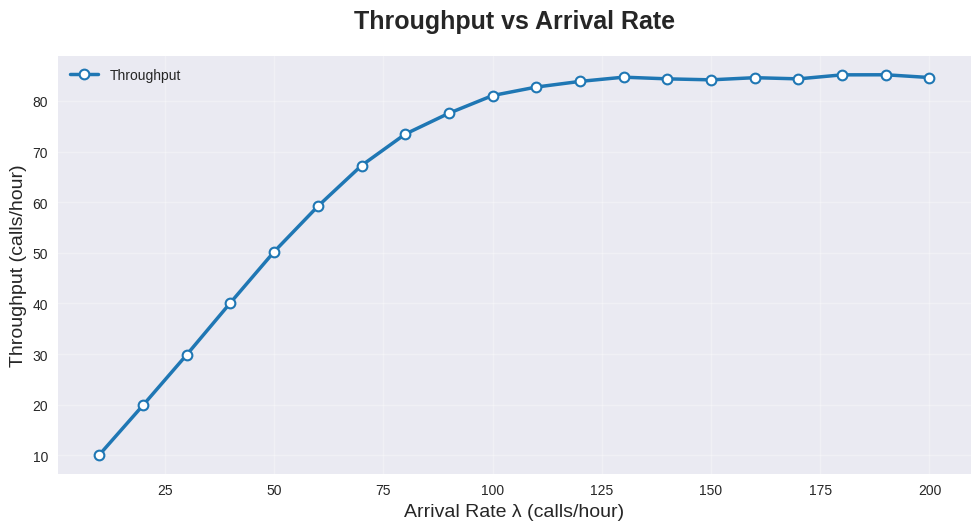

In [ ]:
plot_throughput_chart(lambda_values, throughputs)


**Nhận xét:** Biểu đồ throughput cho thấy hệ thống tăng thông lượng nhanh chóng khi λ tăng từ 10 đến 90 calls/h và đạt cực đại quanh 100–105 calls/h. Sau mốc này, throughput không tăng thêm mà ổn định thành đường nằm ngang, cho thấy hệ thống đã chạm giới hạn phục vụ tối đa. Dù λ tiếp tục tăng, throughput không thay đổi do phần lớn cuộc gọi bị từ chối hoặc rớt ở đầu vào. Đặc điểm “đi ngang” của throughput là minh chứng rõ ràng rằng hệ thống đã bước vào trạng thái saturated capacity, chỉ xử lý được tối đa ~100 calls/h bất kể số lượng yêu cầu đầu vào.

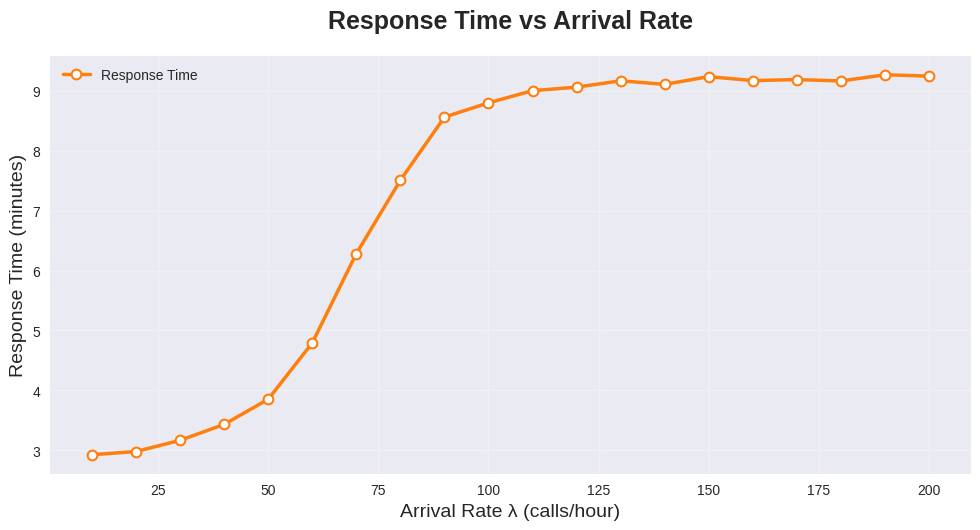

In [ ]:
plot_response_time_chart(lambda_values, response_times)


**Nhận xét:** Thời gian phản hồi của hệ thống tăng nhanh theo λ, đặc biệt rõ trong khoảng từ 20 đến 90 calls/h – nơi hiệu ứng congestion bắt đầu xuất hiện. Sau khi vượt qua khoảng λ ≈ 90, response time tiến gần đến một “plateau” quanh 8.5–9 phút, phản ánh hệ thống bị bão hòa, khách chỉ nhận được phản hồi sau khi chờ dài trong hàng đợi, dẫn tới độ trễ lớn và ổn định ở mức cao. Đây là hành vi điển hình của hệ thống M/M/c/K khi λ vượt quá khả năng phục vụ: thời gian chờ tăng nhanh rồi giữ ổn định do phần lớn khách bắt đầu bị rớt, làm giảm số khách thực sự đi qua hệ thống.

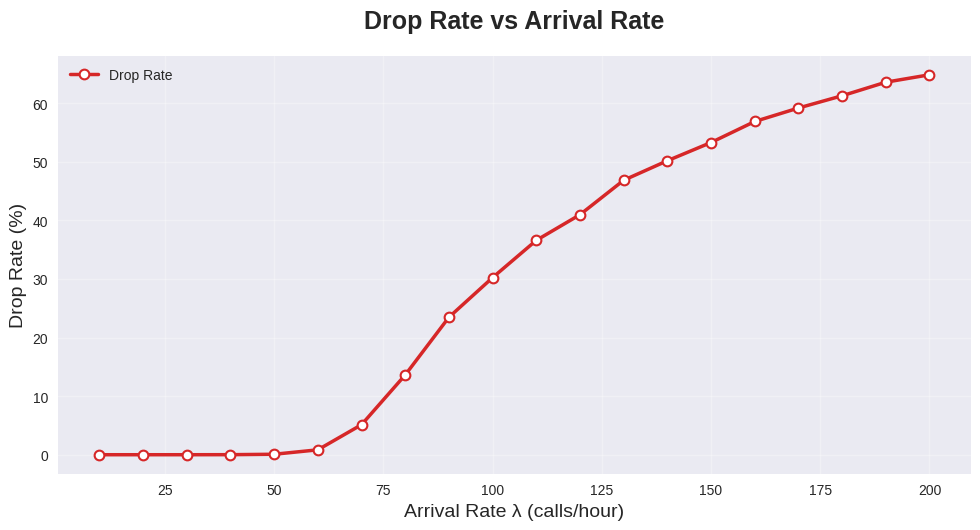

In [ ]:
plot_drop_rate_chart(lambda_values, drop_rates)

**Nhận xét:** Tỷ lệ rớt cuộc gọi gần như bằng 0 ở mức tải thấp, nhưng tăng đột biến sau mốc λ = 60 calls/h và tiếp tục leo thang mạnh khi hệ thống bị quá tải. Đến vùng λ > 175, drop rate vượt 60% và tiến dần đến 70% ở λ = 200. Điều này cho thấy hệ thống có giới hạn năng lực xử lý rõ ràng: khi tổng tải vượt khả năng của mạng hàng đợi đa trạm, số lượng khách không thể vào hệ thống ngày càng tăng, dẫn đến tỷ lệ rớt rất cao. Đây là dấu hiệu rõ ràng của saturation và chứng minh hệ thống cần mở rộng tài nguyên nếu muốn vận hành ổn định ở tải lớn.

PHASE 2: Tính toán Utilization từng trạm...
  [ 1/20] Tính utilization cho λ =   10.0... Done
 Done → rho=  0.1 %
  [ 2/20] Tính utilization cho λ =   20.0... Done
 Done → rho=  0.2 %
  [ 3/20] Tính utilization cho λ =   30.0... Done
 Done → rho=  0.2 %
  [ 4/20] Tính utilization cho λ =   40.0... Done
 Done → rho=  0.3 %
  [ 5/20] Tính utilization cho λ =   50.0... Done
 Done → rho=  0.4 %
  [ 6/20] Tính utilization cho λ =   60.0... Done
 Done → rho=  0.5 %
  [ 7/20] Tính utilization cho λ =   70.0... Done
 Done → rho=  0.5 %
  [ 8/20] Tính utilization cho λ =   80.0... Done
 Done → rho=  0.6 %
  [ 9/20] Tính utilization cho λ =   90.0... Done
 Done → rho=  0.6 %
  [10/20] Tính utilization cho λ =  100.0... Done
 Done → rho=  0.6 %
  [11/20] Tính utilization cho λ =  110.0... Done
 Done → rho=  0.5 %
  [12/20] Tính utilization cho λ =  120.0... Done
 Done → rho=  0.6 %
  [13/20] Tính utilization cho λ =  130.0... Done
 Done → rho=  0.5 %
  [14/20] Tính utilization cho λ =  140.0... D

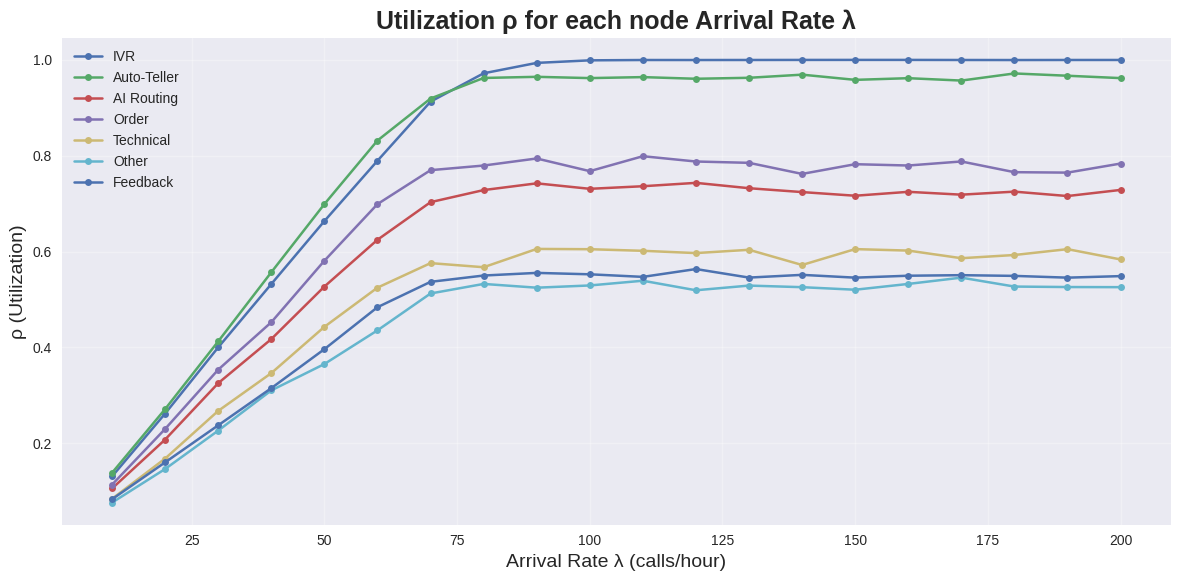

In [ ]:
# @title
# -------- PHASE 2: Utilization per station --------
print("PHASE 2: Tính toán Utilization từng trạm...")

station_names = ["IVR", "Auto-Teller", "AI Routing", "Order", "Technical", "Other", "Feedback"]
rho_by_station = {st: [] for st in station_names}

for j, lam in enumerate(lambda_values):
    print(f"  [{j + 1:2d}/{len(lambda_values)}] Tính utilization cho λ = {lam:6.1f}...", end="")

    workload = generate_workload_from_source_rate(lam, BASE_STATION_CONFIG, ROUTING_MATRIX, STATION_NAME_TO_IDX)

    env = simpy.Environment()
    cc = CallCenter(env, workload, ROUTING_MATRIX, STATION_NAME_TO_IDX, IDX_TO_STATION_NAME)

    env.process(cc.generate_arrivals())
    env.run(until=warmup_hours)
    cc.start_collecting()
    env.run(until=warmup_hours + simulation_hours)

    mon = cc.monitor

    for name, lam_eff, mu, c, k in workload[1:]:
        total_service = sum(mon.service_times_data[name])
        rho = total_service / (c * simulation_hours) if c > 0 else 0
        rho_by_station[name].append(rho)

    print(" Done")
    print(f" Done → rho={rho:5.1f} %")
# Vẽ biểu đồ Phase 2
print("Vẽ biểu đồ Phase 2...")
plot_utilization_chart(lambda_values, rho_by_station)

print("=" * 80)

**Nhận xét:** Biểu đồ Utilization cho thấy hầu hết các trạm bắt đầu tiến gần đến mức sử dụng tối đa (ρ ≈ 1) khi λ tăng lên ~50 calls/h, đặc biệt là IVR, Auto-Teller và AI Routing. Sau ngưỡng này, từng trạm duy trì mức sử dụng gần như bão hòa, chứng tỏ hệ thống hoạt động tại công suất tối đa. Các trạm như Order, Technical và Other đạt mức ρ thấp hơn do ít lưu lượng hơn hoặc có khả năng phục vụ cao hơn, nhưng vẫn cho thấy xu hướng tăng dần theo λ. Điều này chỉ ra rằng khi hệ thống tăng tải, các trạm đầu (IVR, Auto-Teller) trở thành điểm nghẽn chính, kéo theo mức sử dụng cao liên tục.

PHASE 3: Phân tích phân phối thời gian chờ...
Vẽ biểu đồ Phase 3...


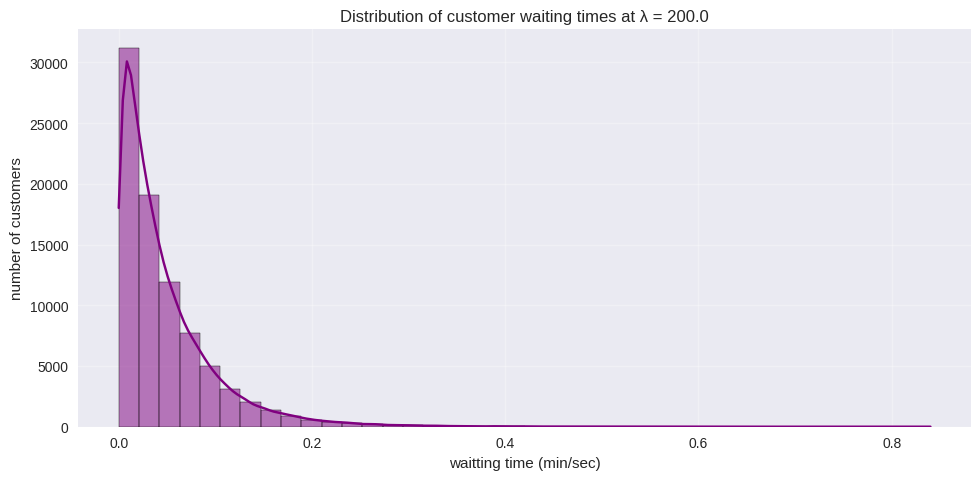

In [ ]:

# -------- PHASE 3: Wait Time Distribution --------
print("PHASE 3: Phân tích phân phối thời gian chờ...")

wait_times = []
for st in mon.service_times_data:
    wait_times.extend(mon.service_times_data[st])

# Vẽ biểu đồ Phase 3
print("Vẽ biểu đồ Phase 3...")
plot_wait_time_distribution(wait_times, lambda_values[-1])

**Nhận xét:**
Biểu đồ phân phối thời gian chờ tại mức tải rất lớn (λ = 200 calls/h) cho thấy phần lớn khách hàng có thời gian chờ gần như bằng 0 phút, thể hiện hệ thống vẫn xử lý nhanh trong đa số trường hợp. Tuy vậy, phần đuôi của phân phối kéo dài sang phải cho thấy vẫn tồn tại một nhóm nhỏ khách phải chờ lâu hơn, phản ánh hiện tượng tắc nghẽn cục bộ khi toàn bộ server đồng thời bận. Đây là đặc trưng của phân phối mũ trong hệ thống hàng đợi M/M/c: khi lưu lượng tiến sát hoặc vượt khả năng phục vụ, xác suất xuất hiện các thời gian chờ dài tăng lên, mặc dù phần lớn khách vẫn được phục vụ nhanh nhờ tính ngẫu nhiên và sự phân tán của quá trình phục vụ.